# Loan Application Status Prediction

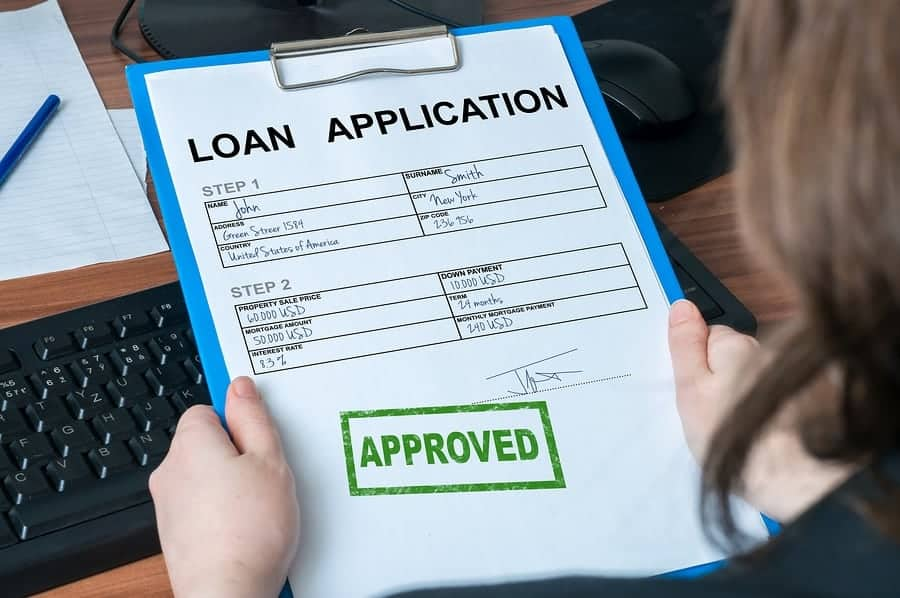

### Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

### Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

### Dependent Variable (Target Variable):

- Loan_Status

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Data Analysis

In [2]:
pd.set_option("max_rows", None)
pd.set_option("max_columns", None)

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/arjun0200/Datasets/main/loan_prediction.csv")
df.head(5)  # checking first rows of the dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.tail(5)   # checking last rows of the dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
df.sample(5)  # checking random rows of the dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
514,LP002652,Male,No,0,Graduate,No,5815,3666.0,311.0,360.0,1.0,Rural,N
586,LP002916,Male,Yes,0,Graduate,No,2297,1522.0,104.0,360.0,1.0,Urban,Y
532,LP002723,Male,No,2,Graduate,No,3588,0.0,110.0,360.0,0.0,Rural,N
153,LP001532,Male,Yes,2,Not Graduate,No,2281,0.0,113.0,360.0,1.0,Rural,N
335,LP002106,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y


In [6]:
df.shape # checking size of the dataset

(614, 13)

### Checking some more dataset rows for better understandings

In [7]:
df.head(50)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


## Checking columns

In [258]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### Checking Target Variable

Y    422
N    192
Name: Loan_Status, dtype: int64


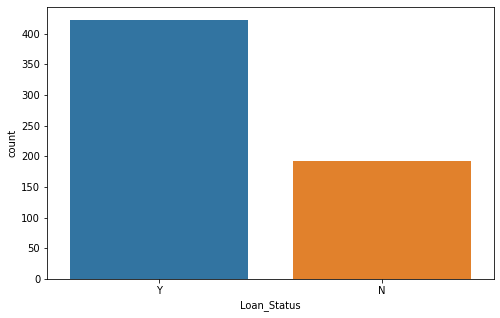

In [8]:
plt.figure(figsize = (8,5))
target = df.Loan_Status.value_counts()
print(target)
target = sns.countplot(df.Loan_Status)

### Observations of the target variable
- Loan Approved status are higher than No Loan Approved status.

In [9]:
df.dtypes  # checking datatypes of the dataset

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

#### Observations:
- ApplicantIncome is a integer type value and we know that dataset of income can't be of integer type. Hence we need to fix it.

In [10]:
df['ApplicantIncome'] = df['ApplicantIncome'].astype('float')

In [11]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

#### Observations:-
- ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History' these columns of dataset are of float type.
- Loan_ID', 'Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'Property_Area', 'Loan_Status' these columns of dataset are of object type.

In [12]:
df.info()  # checking basic summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [13]:
df.describe(include = 'all')  # checking overall summary of the dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


<AxesSubplot:>

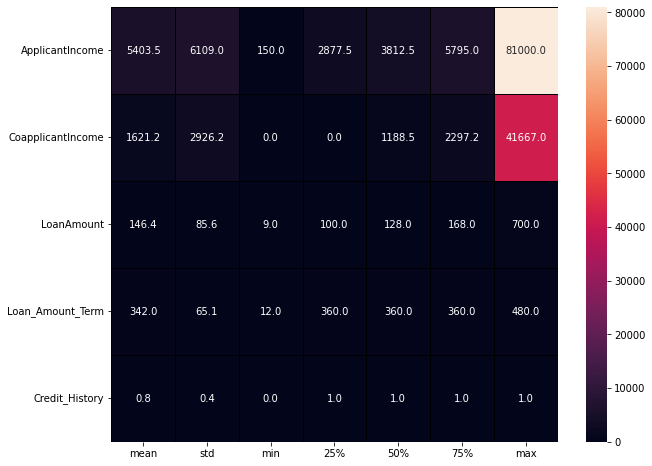

In [14]:
plt.figure(figsize = (10,8))
sns.heatmap(df.describe()[1:].transpose(), linewidths = 1, linecolor = 'black', annot = True, fmt = '.1f' )

- From above information we find that max values of ApplicantIncome, and CoapplicantIncome are much higher than its overall values. Due to these columns of dataset probably having outliers in the dataset.

### Checking Null Values of the Dataset

In [15]:
df.isnull().sum()/len(df)*100  # in percentage

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

#### Observations:
   - We find that above code most of the columns having null values with upto 9 percentage.

<AxesSubplot:>

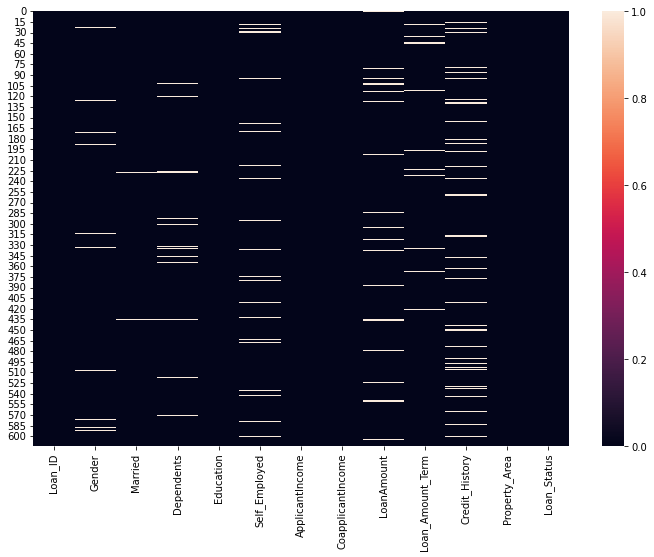

In [16]:
plt.figure(figsize = (12,8))
sns.heatmap(df.isnull())

#### From above observations we find that Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History dataset having null values.

## Exploratory Data Analysis

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


### Checking Duplicates Values¶

#### Checking Duplicates counts

In [18]:
df.duplicated().sum()   # duplicate values counts of the dataset 

0

#### From above code we find that dataset does't having any duplicate values.

In [19]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### Checking unique values of the dataset

In [20]:
for i in df:
    print(i,'\n' ,df[i].unique().shape)  # checking unique values counts

Loan_ID 
 (614,)
Gender 
 (3,)
Married 
 (3,)
Dependents 
 (5,)
Education 
 (2,)
Self_Employed 
 (3,)
ApplicantIncome 
 (505,)
CoapplicantIncome 
 (287,)
LoanAmount 
 (204,)
Loan_Amount_Term 
 (11,)
Credit_History 
 (3,)
Property_Area 
 (3,)
Loan_Status 
 (2,)


#### Checking Independent Variable

In [21]:
df['Loan_ID'].unique().shape  #Loan_ID is a Indenpendent Variable which used to identify customer. 

(614,)

#### From above all observations we find that Load_ID is a independent categorical value which is used to identify customer as per dataset.
- Hence we need to drop it for model prediction as due to these values model can shows bias and variance.
- Load_ID is just unique number of customer identifications.

In [22]:
df.drop(['Loan_ID'], inplace = True, axis = 1)

In [23]:
df.head(2) #checking dataset after removal of loan_ID

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N


### Dividing columns into object and numerical categories for easy visualization understandings

In [24]:
df_object = df.select_dtypes(include = 'object').columns  # object dataset columns
df_num = df.select_dtypes(exclude = 'object').columns  # integer dataset columns

In [25]:
df_object  # checking object columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [26]:
df_num  # checking non object columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [27]:
for i in df_object:
    print(i,'\n' ,df[i].unique(), "\n")  # checking unique values

Gender 
 ['Male' 'Female' nan] 

Married 
 ['No' 'Yes' nan] 

Dependents 
 ['0' '1' '2' '3+' nan] 

Education 
 ['Graduate' 'Not Graduate'] 

Self_Employed 
 ['No' 'Yes' nan] 

Property_Area 
 ['Urban' 'Rural' 'Semiurban'] 

Loan_Status 
 ['Y' 'N'] 



# Dealing with Null values

## Object type dataset

Gender

In [28]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [29]:
df['Gender'].isnull().sum()

0

### Using CategoricalImputer to fill NaN categorical values with most frequent objects

In [30]:
#pip install sklearn-pandas==1.5.0

In [31]:
from sklearn_pandas import CategoricalImputer

imputer = CategoricalImputer()
categorical = ['Married', 'Dependents', 'Self_Employed']
for i in categorical:
     df[i] = np.array(df[i], dtype = 'object')
     df[i] = imputer.fit_transform(df[i])

#### Checking unique values of categorical type dataset

In [32]:
for i in df_object:
    print(i,'\n' ,df[i].unique(), "\n")  # checking unique values

Gender 
 ['Male' 'Female'] 

Married 
 ['No' 'Yes'] 

Dependents 
 ['0' '1' '2' '3+'] 

Education 
 ['Graduate' 'Not Graduate'] 

Self_Employed 
 ['No' 'Yes'] 

Property_Area 
 ['Urban' 'Rural' 'Semiurban'] 

Loan_Status 
 ['Y' 'N'] 



In [33]:
df[df_object].isnull().sum()

Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

<AxesSubplot:>

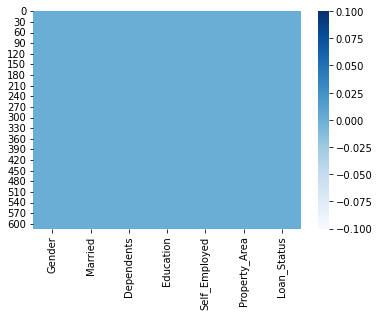

In [34]:
sns.heatmap(df[df_object].isnull(), cmap = 'Blues')

# Numerical type dataset

In [35]:
df[df_num].isnull().sum()/len(df[df_num])*100

ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
dtype: float64

## Checking for LoanAmount

In [36]:
df_loan_amount_mean = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [37]:
df_loan_amount_median = df['LoanAmount'].fillna(df['LoanAmount'].median())

### Checking suitable imputation methods

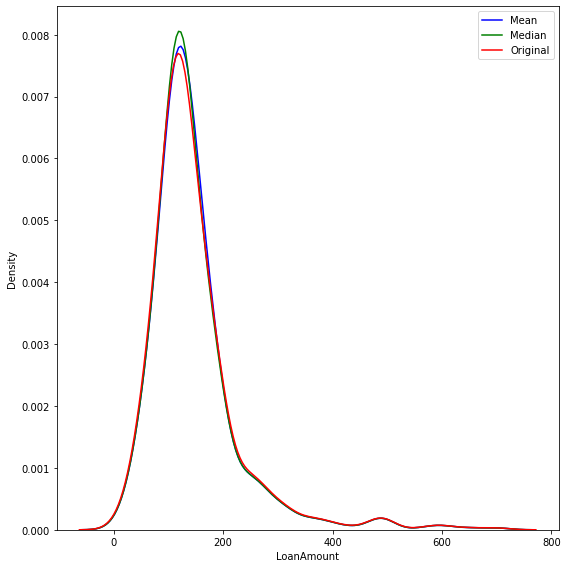

In [38]:
plt.figure(figsize = (8,8))
sns.distplot(df_loan_amount_mean, bins = 20, hist = False, color = 'b', label = 'mean' )
sns.distplot(df_loan_amount_median, bins = 20, hist = False, color = 'g', label = 'median')
sns.distplot(df['LoanAmount'], bins = 20, hist = False, color = 'r', label = 'Original')
plt.legend(labels=['Mean','Median', 'Original'])
plt.tight_layout()

### From above imputations we find that mean method shows better imputation with less disturbance in original database. 
- Hence we use mean imputation method to fill NaN values.

In [39]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [40]:
df['LoanAmount'].isnull().sum()  # checking null values

0

## Checking for Loan_Amount_Term

In [41]:
df_num

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [42]:
df_loan_amount_term_mean = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

In [43]:
df_loan_amount_term_median = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())

### Checking suitable imputation methods

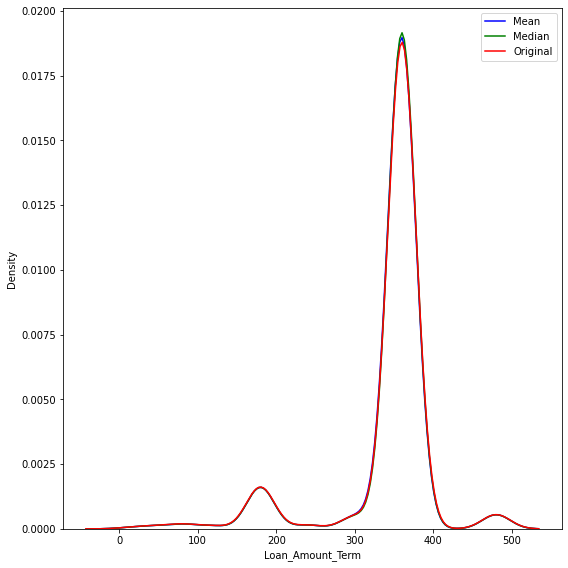

In [44]:
plt.figure(figsize = (8,8))
sns.distplot(df_loan_amount_term_mean, bins = 20, hist = False, color = 'b', label = 'mean' )
sns.distplot(df_loan_amount_term_median, bins = 20, hist = False, color = 'g', label = 'median')
sns.distplot(df['Loan_Amount_Term'], bins = 20, hist = False, color = 'r', label = 'Original')
plt.legend(labels=['Mean','Median', 'Original'])
plt.tight_layout()

### From above imputations we find that mean method shows slightly closer imputation with respect to original database. 
- Hence we use mean imputation method to fill NaN values.

In [45]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

In [46]:
df['Loan_Amount_Term'].isnull().sum()  # checking null values

0

## Checking for Credit_History

In [47]:
df_Credit_History_mean = df['Credit_History'].fillna(df['Credit_History'].mean())

In [48]:
df_Credit_History_median = df['Credit_History'].fillna(df['Credit_History'].median())

### Checking suitable imputation methods

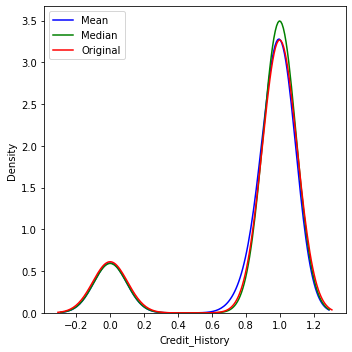

In [49]:
plt.figure(figsize = (5,5))
sns.distplot(df_Credit_History_mean, bins = 20, hist = False, color = 'b', label = 'mean' )
sns.distplot(df_Credit_History_median, bins = 20, hist = False, color = 'g', label = 'median')
sns.distplot(df['Credit_History'], bins = 20, hist = False, color = 'r', label = 'Original')
plt.legend(labels=['Mean','Median', 'Original'])
plt.tight_layout()

#### We use median method for imputation as credit history having only two unique values and as per above graph we didn't find any much difference in imputation this
- Hence we use median imputation method to fill NaN values.

In [50]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())

In [51]:
df['Credit_History'].isnull().sum()  # checking null values

0

In [52]:
df['Credit_History'].unique()

array([1., 0.])

### Checking Numerical dataset again after removal of NaN values

In [53]:
df[df_num].isnull().sum()/len(df[df_num])*100

ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
dtype: float64

<AxesSubplot:>

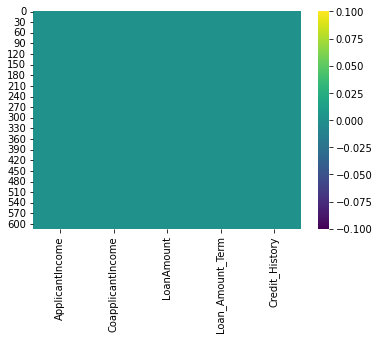

In [54]:
sns.heatmap(df[df_num].isnull(), cmap = 'viridis')

### Check whole dataset null value

In [55]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

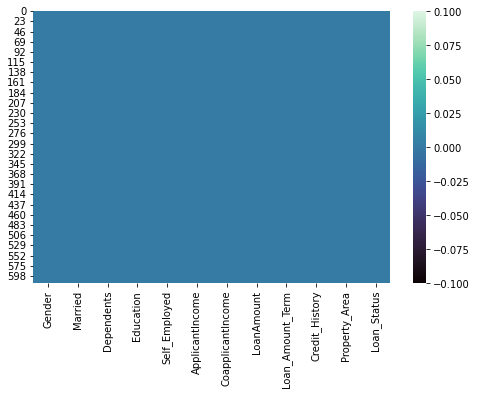

In [56]:
plt.figure(figsize = (8,5))
sns.heatmap(df.isnull(), cmap = 'mako')

# Univariate Analysis with respect to Target Variable

### Categorical Values

In [57]:
df_object

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

## Gender with respect to Loan_Status

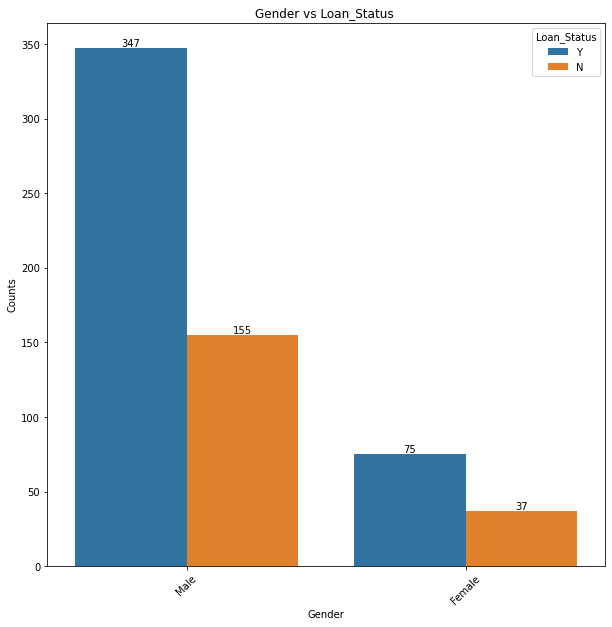

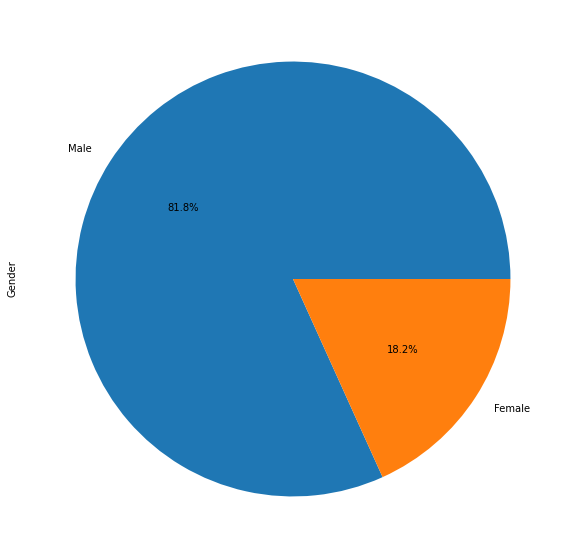

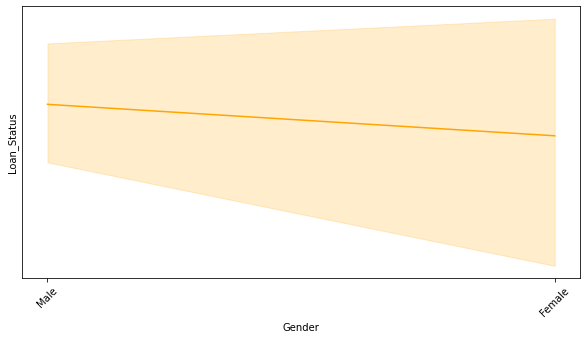

In [58]:
gender = df.Gender.value_counts()
plt.figure(figsize = (10,10))
df_gender = sns.countplot(x='Gender', hue='Loan_Status',data = df)
df_gender.set_title('Gender vs Loan_Status ')
df_gender.set_xlabel('Gender')
df_gender.set_ylabel('Counts')
plt.xticks(rotation = 45)
for i in df_gender.containers:
    df_gender.bar_label(i)
    
# Percentage of gender
plt.figure(figsize = (10,10))
gender.plot(kind = 'pie', autopct = '%1.1f%%')


plt.figure(figsize=(10,5))
sns.lineplot(x="Gender",y="Loan_Status",data=df, color='orange',)
plt.xticks(rotation = 45)
plt.show()


### Observations:

#### Value counts of Gender

In [59]:
# Gender   Counts
# Male      502
# Female    112

- Male candidate are morer than female

#### Value counts of Gender with Loan_Status

In [60]:
# Gender  Loan_Status   Counts
# Female  Y               75
#         N               37
# Male    Y              347
#         N              155

- Male candidate get approved status more than female candidate with repect to overall dataset.

#### Pie Chart

 - From above pie graph we find that 81.8 percentage are the male candidates and rest are female candidates.

#### Line Plot

 - Male candidate get approved status more than female candidate with repect to overall dataset.

## Married status with respect to Loan_Status

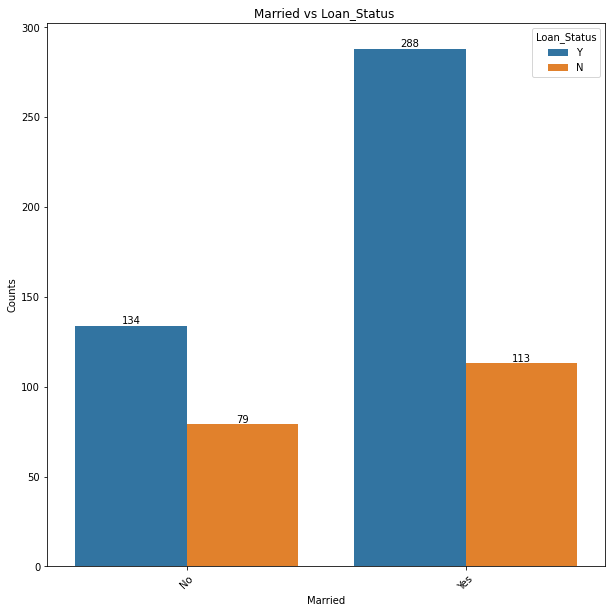

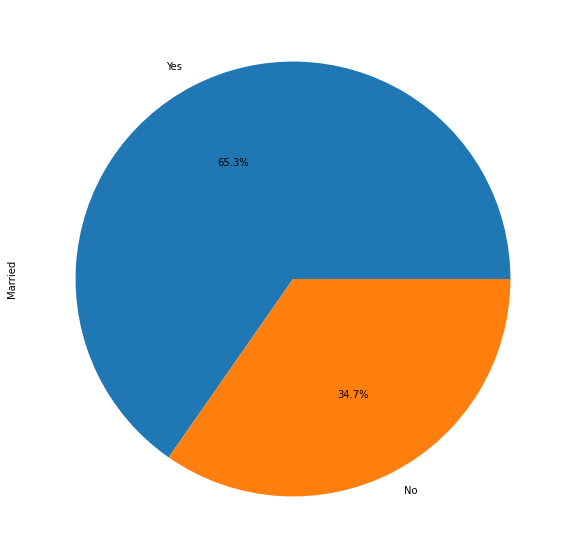

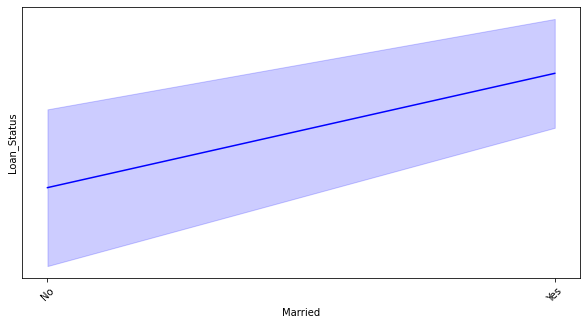

In [61]:
married = df.Married.value_counts()
plt.figure(figsize = (10,10))
df_married = sns.countplot(x='Married', hue='Loan_Status',data = df)
df_married.set_title('Married vs Loan_Status ')
df_married.set_xlabel('Married')
df_married.set_ylabel('Counts')
plt.xticks(rotation = 45)
for i in df_married.containers:
    df_married.bar_label(i)
    
# Percentage of married status
plt.figure(figsize = (10,10))
married.plot(kind = 'pie', autopct = '%1.1f%%')


plt.figure(figsize=(10,5))
sns.lineplot(x="Married",y="Loan_Status",data=df, color='blue',)
plt.xticks(rotation = 45)
plt.show()


### Observations:

#### Value counts of Married

In [62]:
# Married Value_counts
# Yes      401
# No       213

 - Married candidate are morer who applied for loan

#### Value counts of Married with Loan_Status

In [63]:
# Married  Loan_Status   Counts
# No       Y              134
#          N               79
# Yes      Y              288
#          N              113

 - Candidate with married status get loan easier as per dataset.

#### Pie Chart

 - From above pie graph we find that 65.3 percentage are the married candidates and rest are unmarried candidates.

#### Line Plot

 - Candidate with married status are higher and get loan easier as per dataset.

## Dependents with respect to Loan_Status

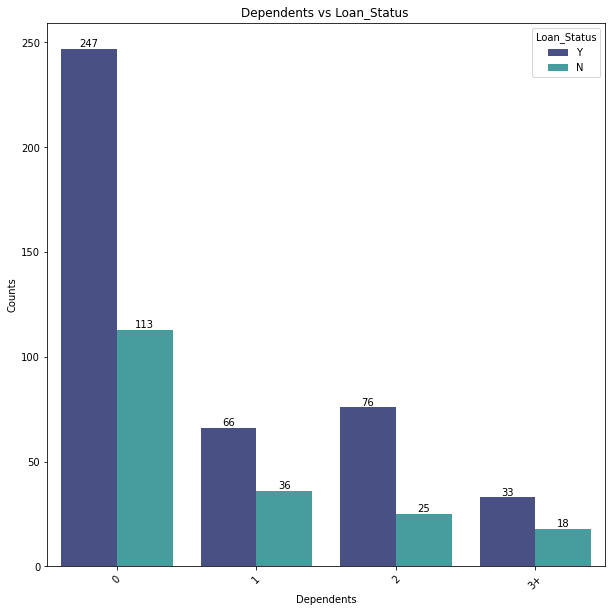

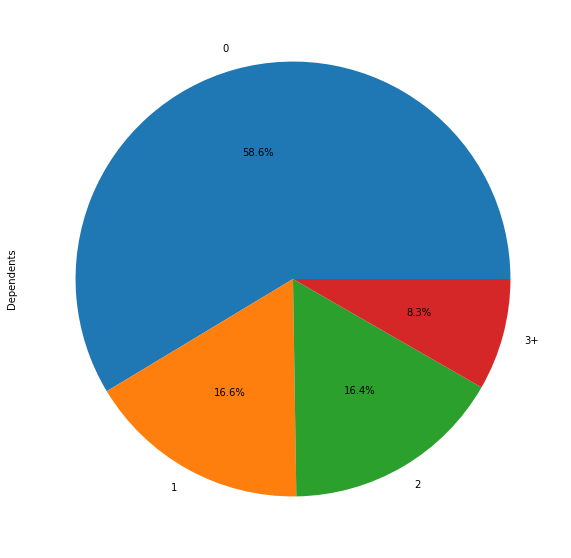

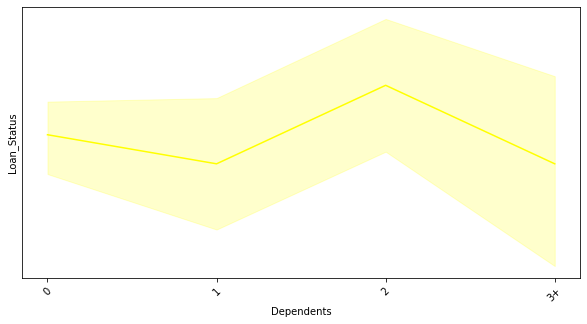

In [64]:
dependents = df.Dependents.value_counts()
plt.figure(figsize = (10,10))
df_dependents = sns.countplot(x='Dependents', hue='Loan_Status',data = df, palette='mako')
df_dependents.set_title('Dependents vs Loan_Status ')
df_dependents.set_xlabel('Dependents')
df_dependents.set_ylabel('Counts')
plt.xticks(rotation = 45)
for i in df_dependents.containers:
    df_dependents.bar_label(i)
    
# Percentage of Dependents
plt.figure(figsize = (10,10))
dependents.plot(kind = 'pie', autopct = '%1.1f%%')


plt.figure(figsize=(10,5))
sns.lineplot(x="Dependents",y="Loan_Status",data=df, color='yellow',)
plt.xticks(rotation = 45)
plt.show()


### Observations:

#### Value counts of Dependents

In [65]:
# Dependents Counts
# 0          360
# 1          102
# 2          101
# 3+         51

 - 0 Dependents candidate are morer who applied for loan and very less 3+ dependent candidates applied for loan

#### Value counts of Dependents with Loan_Status

In [66]:
# Dependents  Loan_Status   Counts
# 0           Y              247
#             N              113
# 1           Y               66
#             N               36
# 2           Y               76
#             N               25
# 3+          Y               33
#             N               18

 - Candidate with 0 Dependents are getting loan more as per dataset.
 - And very few candidate with 3+ Dependents applied for loan.

#### Pie Chart

 - From above pie graph we find that 58.6 ratio are of 0 dependents and only 8.3 ratio are of 3+ dependents.

#### Line Plot

 - Candidate with 0 Dependents status are higher and candidate with 2 dependent also getting higher counts of loan with respect to their dataset.

#### 

## Education with respect to Loan_Status

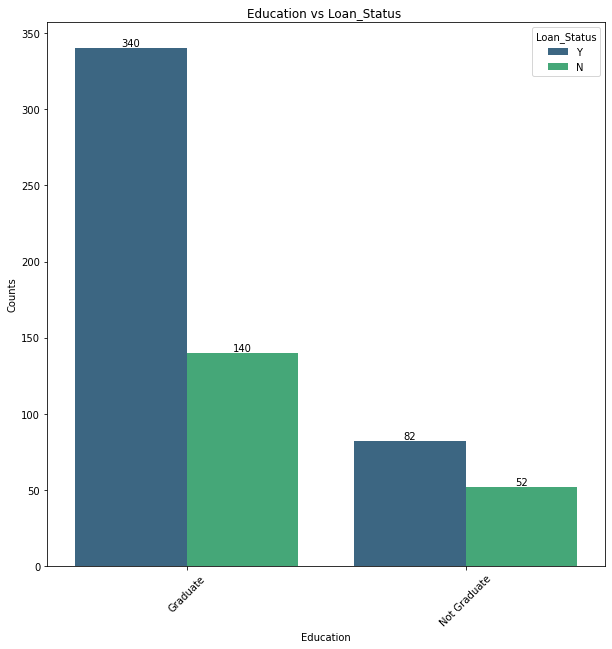

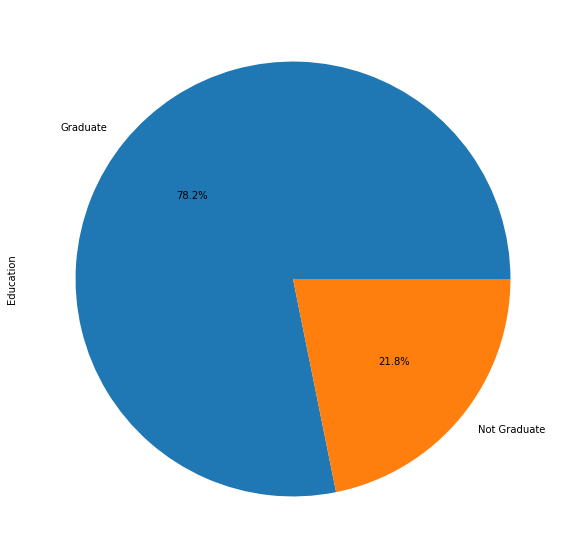

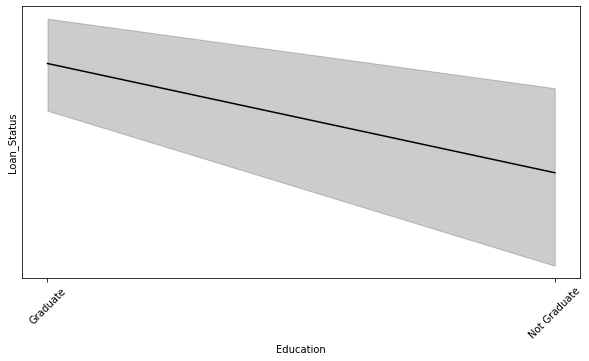

In [67]:
education = df.Education.value_counts()
plt.figure(figsize = (10,10))
df_education = sns.countplot(x='Education', hue='Loan_Status',data = df, palette='viridis')
df_education.set_title('Education vs Loan_Status ')
df_education.set_xlabel('Education')
df_education.set_ylabel('Counts')
plt.xticks(rotation = 45)
for i in df_education.containers:
    df_education.bar_label(i)
    
# Percentage of Education
plt.figure(figsize = (10,10))
education.plot(kind = 'pie', autopct = '%1.1f%%')


plt.figure(figsize=(10,5))
sns.lineplot(x="Education",y="Loan_Status",data=df, color='black',)
plt.xticks(rotation = 45)
plt.show()


### Observations:

#### Value counts of Education

In [68]:
# Education      Counts
# Graduate        480
# Not Graduate    134

 - Graduate candidate are morer who applied for loan.

#### Value counts of Education with Loan_Status

In [69]:
# Education     Loan_Status   Counts
# Graduate      Y              340
#               N              140
# Not Graduate  Y               82
#               N               52

 - Candidate with Graduation are getting loan more as per dataset.

#### Pie Chart

 - From above pie graph we find that 78.2 ratio are of graduates candidate who applied for loan.

#### Line Plot

 - Candidate with Graduation status are higher and getting higher counts of loan with respect to their dataset.

## Self_Employed with respect to Loan_Status

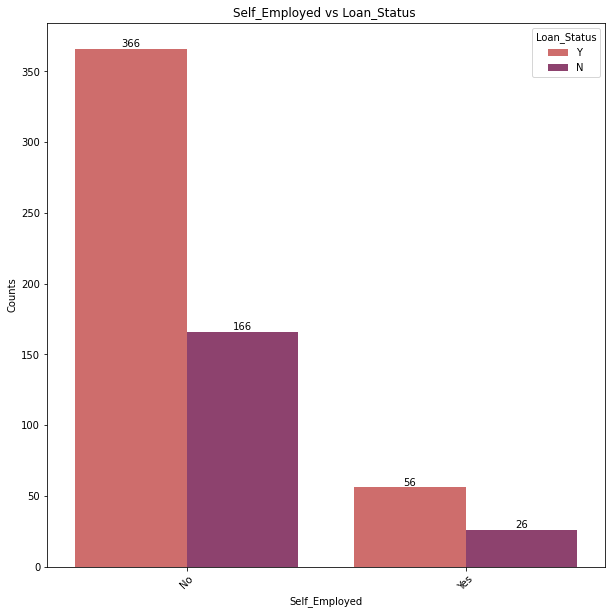

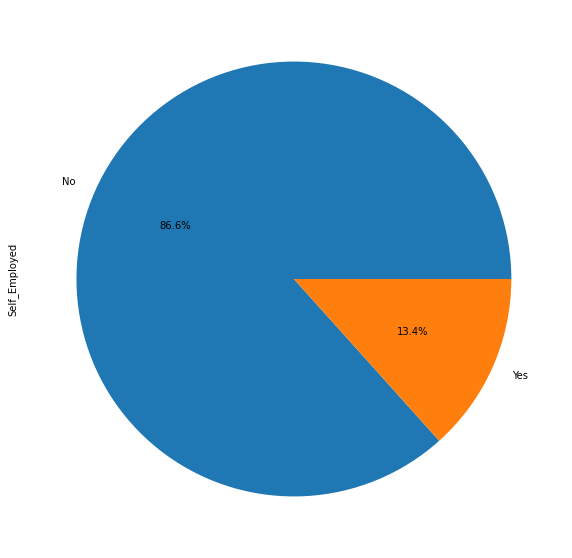

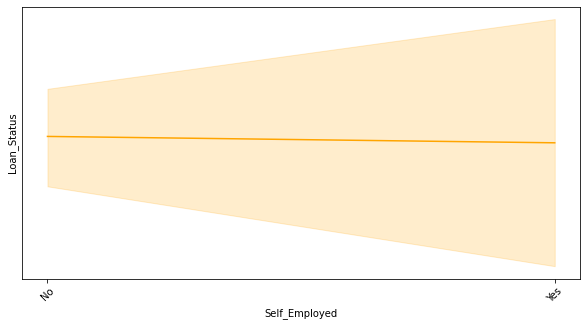

In [70]:
self_employed = df.Self_Employed.value_counts()
plt.figure(figsize = (10,10))
df_self_employed = sns.countplot(x='Self_Employed', hue='Loan_Status',data = df, palette='flare')
df_self_employed.set_title('Self_Employed vs Loan_Status ')
df_self_employed.set_xlabel('Self_Employed')
df_self_employed.set_ylabel('Counts')
plt.xticks(rotation = 45)
for i in df_self_employed.containers:
    df_self_employed.bar_label(i)
    
# Percentage of Self Employed
plt.figure(figsize = (10,10))
self_employed.plot(kind = 'pie', autopct = '%1.1f%%')


plt.figure(figsize=(10,5))
sns.lineplot(x="Self_Employed",y="Loan_Status",data=df, color='orange',)
plt.xticks(rotation = 45)
plt.show()


### Observations:

#### Value counts of Self_employed

In [71]:
# #Self_employed Counts
# No             532
# Yes            82

 - Only 82 Self_employed candidate which are very less who applied for loan.

#### Value counts of Self_employed with Loan_Status

In [72]:
# Self_Employed  Loan_Status   Counts
# No             Y              366
#                N              166
# Yes            Y               56
#                N               26

 - From above dataset we find that self employed candidate are not getting loan cause firm not find those candidate for repayment of loan.
 - And very few candidate with self employed status are getting loan.

#### Pie Chart

 - From above pie graph we find that 86.6 ratio are of not self employed and rest are self employed.

#### Line Plot

 - Candidate with self employed status are very few but some of get loan as per dataset, while a working candidate getting easier loan. 

#### 

## Property_Area with respect to Loan_Status

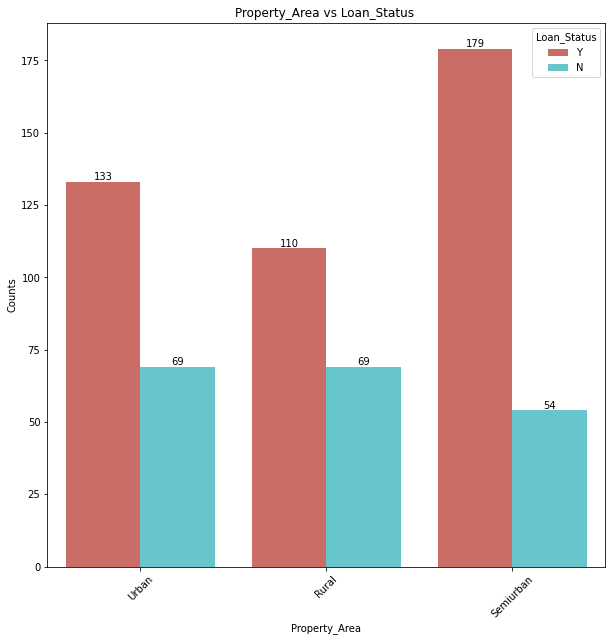

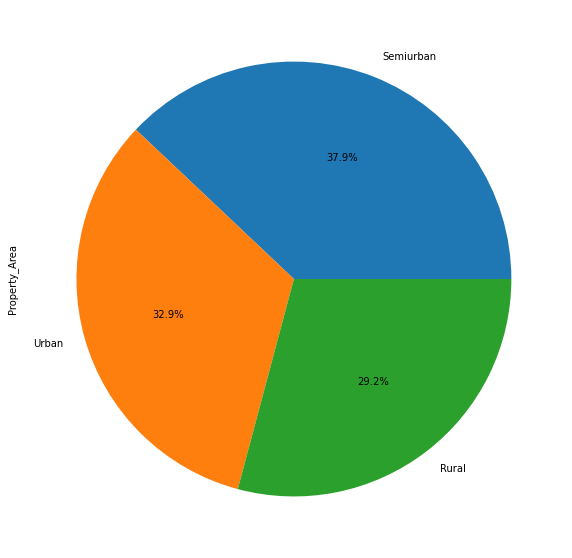

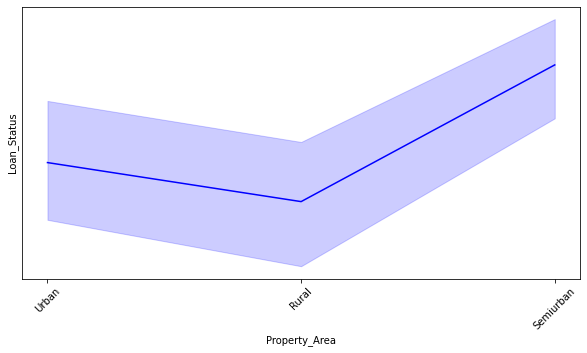

In [73]:
property_Area = df.Property_Area.value_counts()
plt.figure(figsize = (10,10))
df_property_Area = sns.countplot(x='Property_Area', hue='Loan_Status',data = df, palette='hls')
df_property_Area.set_title('Property_Area vs Loan_Status ')
df_property_Area.set_xlabel('Property_Area')
df_property_Area.set_ylabel('Counts')
plt.xticks(rotation = 45)
for i in df_property_Area.containers:
    df_property_Area.bar_label(i)
    
# Percentage of Property_Area
plt.figure(figsize = (10,10))
property_Area.plot(kind = 'pie', autopct = '%1.1f%%')


plt.figure(figsize=(10,5))
sns.lineplot(x="Property_Area",y="Loan_Status",data=df, color='blue',)
plt.xticks(rotation = 45)
plt.show()


### Observations:

#### Value counts of Property_Area

In [74]:
# Property_Area  Counts
# Semiurban      233
# Urban          202
# Rural          179

#### Value counts of Property_Area with Loan_Status

In [75]:
# Property_Area  Loan_Status   Counts
# Rural          Y              110
#                N               69
# Semiurban      Y              179
#                N               54
# Urban          Y              133
#                N               69

 - From above dataset we find that candidate which are having property in Semiurban area are getting more counts of loan rather than Rural and Urban areas.


#### Pie Chart

 - From above pie graph we find that candidate having property area as in ratio of 37.9 % Semiurban, 32.9 % Urban and 29.2 % Rural areas.

#### Line Plot

 - From line plot we find that more of the candidate which are getting approved loan status are of Rural and Semiurban property areas.

## Credit_History with respect to Loan_Status

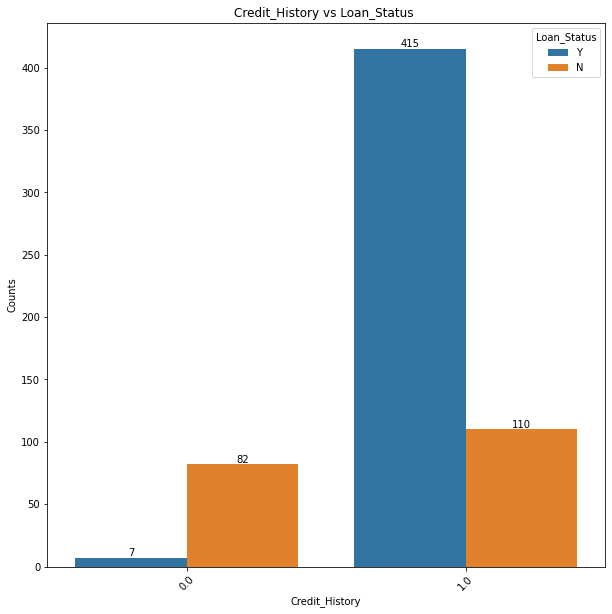

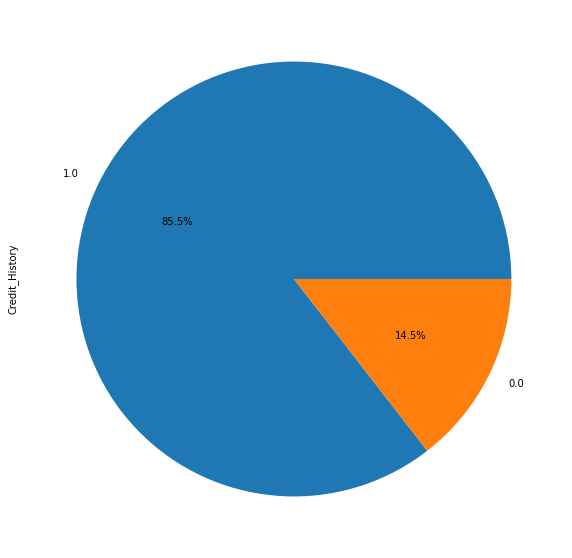

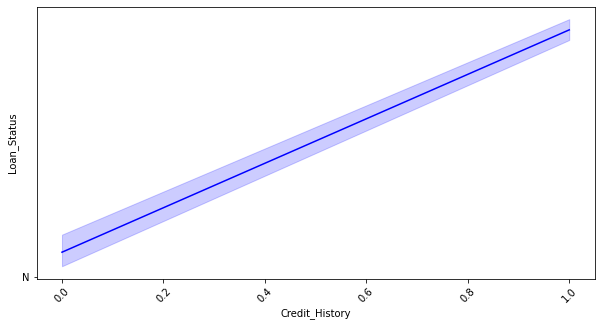

In [76]:
Credit_History = df.Credit_History.value_counts()
plt.figure(figsize = (10,10))
df_Credit_History = sns.countplot(x='Credit_History', hue='Loan_Status',data = df)
df_Credit_History.set_title('Credit_History vs Loan_Status ')
df_Credit_History.set_xlabel('Credit_History')
df_Credit_History.set_ylabel('Counts')
plt.xticks(rotation = 45)
for i in df_Credit_History.containers:
    df_Credit_History.bar_label(i)
    
# Percentage of Credit_History
plt.figure(figsize = (10,10))
Credit_History.plot(kind = 'pie', autopct = '%1.1f%%')


plt.figure(figsize=(10,5))
sns.lineplot(x="Credit_History",y="Loan_Status",data=df, color='blue',)
plt.xticks(rotation = 45)
plt.show()


### Observations:

#### Value counts of Credit_History

In [77]:
# Credit_History   Counts
# 1.0               525
# 0.0               89

#### Value counts of Credit_History with Loan_Status

In [78]:
# Credit_History  Loan_Status   Counts
# 0.0             N               82
#                 Y                7
# 1.0             Y              415
#                 N              110

 - From above dataset we find that candidate which are already applied for a loan are getting more in counts.


#### Pie Chart

 - From above pie graph we find that candidate which already taken single loan are going to applied more with the ratio of 85.5 percentage.

#### Line Plot

 - From line plot we find that more of the candidate which are getting approved loan status are availed a loan before.

## Numerical Values

In [79]:
df_num

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

### Categorical Plot

## ApplicantIncome with respect to Loan_Status

<Figure size 720x576 with 0 Axes>

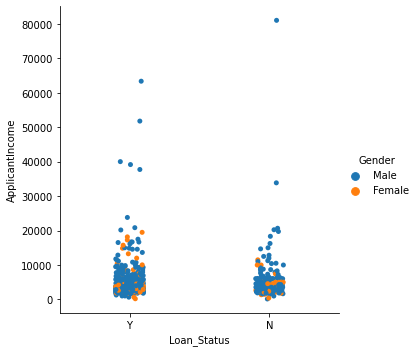

In [80]:
plt.figure(figsize = (10,8))
sns.catplot(x = "Loan_Status", y = "ApplicantIncome", hue = 'Gender', data = df)

#### Observations:-
   - Candidate which having income approx range 500 to 20000 are higher in count which applied for loan. 

#### 

## CoapplicantIncome with respect to Loan_Status

<Figure size 720x576 with 0 Axes>

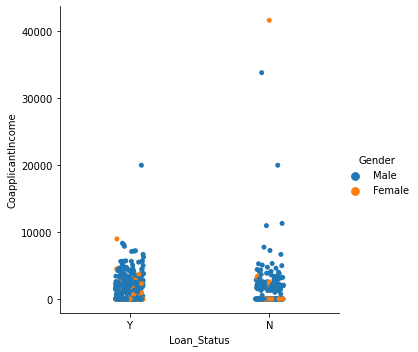

In [81]:
plt.figure(figsize = (10,8))
sns.catplot(x = "Loan_Status", y = "CoapplicantIncome", hue = 'Gender', data = df)

#### Observations:-
   - Coapplicant Candidate which having income approx range 0 to 8000 are higher in count which applied for loan. 

#### 

## LoanAmount with respect to Loan_Status

<Figure size 720x576 with 0 Axes>

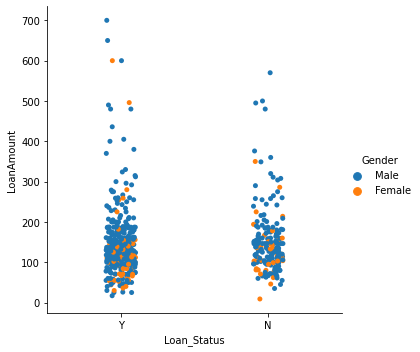

In [82]:
plt.figure(figsize = (10,8))
sns.catplot(x = "Loan_Status", y = "LoanAmount", hue = 'Gender', data = df)

#### Observations:-
   - Most of the candidate are applied loan amount in a range of approx 5 to 300.
   - And there are some of applicant which applied higher as per above graph.

#### 

## Loan_Amount_Term with respect to Loan_Status

<Figure size 720x576 with 0 Axes>

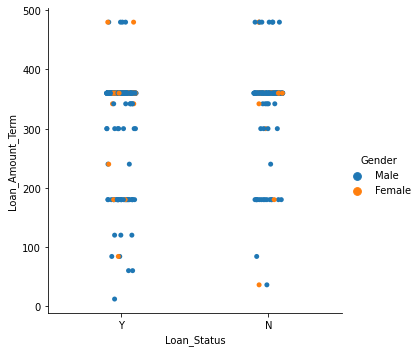

In [83]:
plt.figure(figsize = (10,8))
sns.catplot(x = "Loan_Status", y = "Loan_Amount_Term", hue = 'Gender', data = df)

### Observations:-
   - Many of the Candidate having loan_amount_term in a specific term which are 360, 180, 300 and as per dataset some applied in term of 120, 240, 342, 60, 480, 36, 84, 12 also. 

In [84]:
# df['Loan_Amount_Term'].unique()
# array([360., 120., 240., 342., 180.,  60., 300., 480.,  36.,  84.,  12.])

#### 

### Box Plot

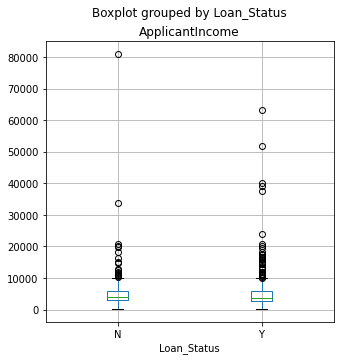

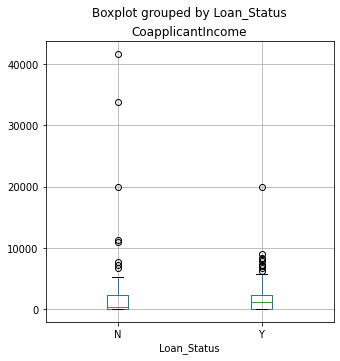

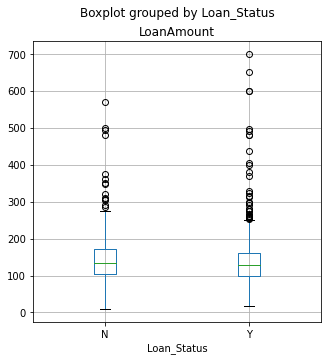

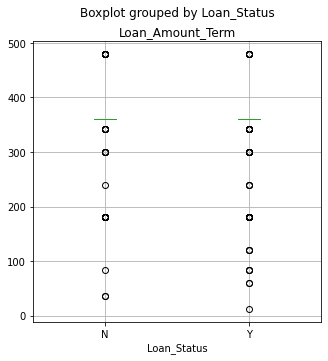

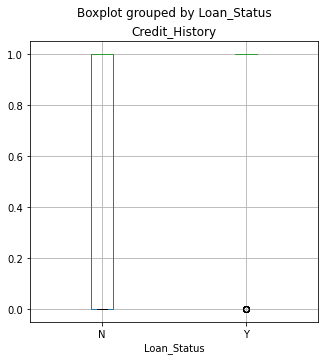

(array([1, 2, 3, 4, 5]),
 [Text(1, 0, 'ApplicantIncome'),
  Text(2, 0, 'CoapplicantIncome'),
  Text(3, 0, 'LoanAmount'),
  Text(4, 0, 'Loan_Amount_Term'),
  Text(5, 0, 'Credit_History')])

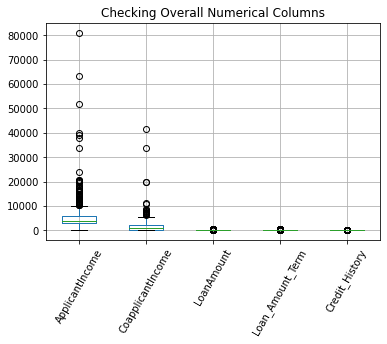

In [85]:
for i in df_num:
    df.boxplot(column = i, by = 'Loan_Status', figsize = (5,6))
    plt.subplots_adjust(bottom = 0.25)
    plt.show()
    print("\n")
    
plt.title("Checking Overall Numerical Columns")
df[df_num].boxplot(figsize = (10,8))
plt.xticks(rotation = 60)

### Most of the columns having outliers in the dataset.

## Bivariate Analysis

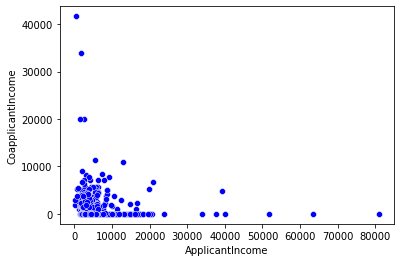

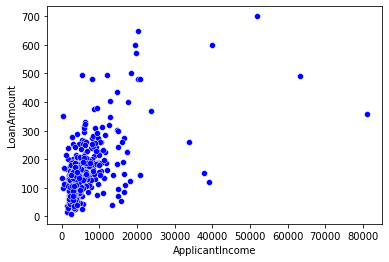

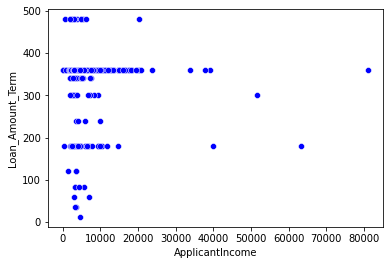

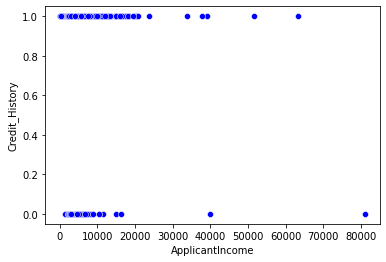

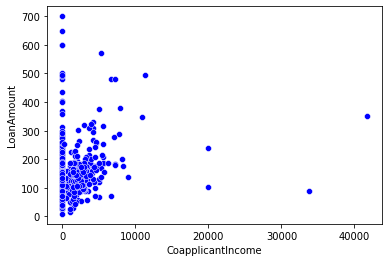

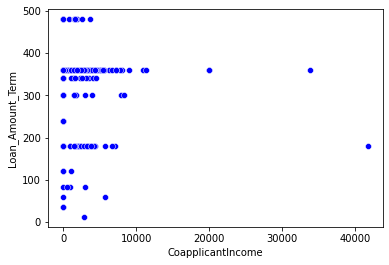

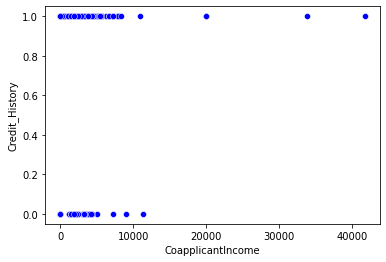

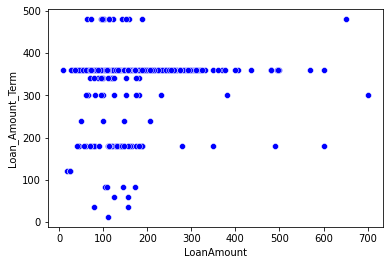

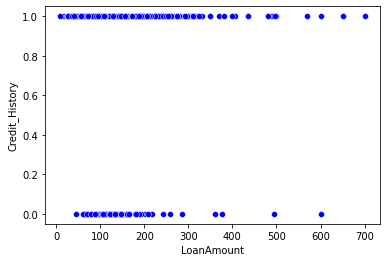

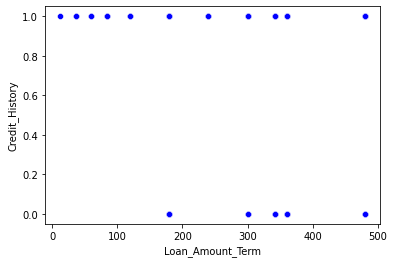

In [86]:
for i in range(len(df_num)):
    for j in df_num[i+1:]:
         plt.figure()
         sns.scatterplot(df[df_num[i]], df[j], color = 'b')

#### Observations: Loan amount are increase with applicant income, and coapplicant income.

## Checking Distribution of the dataset

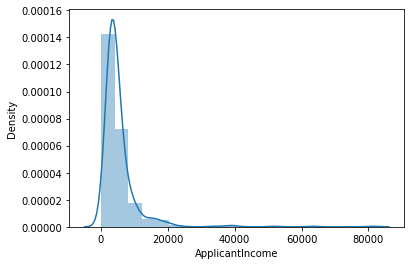

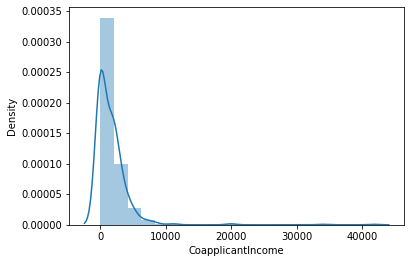

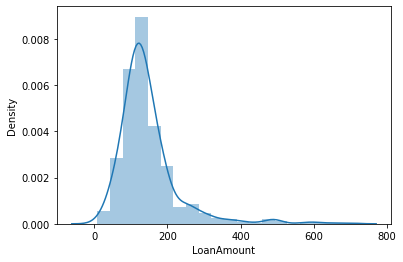

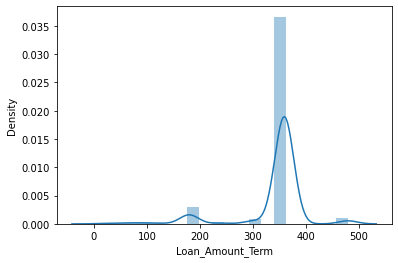

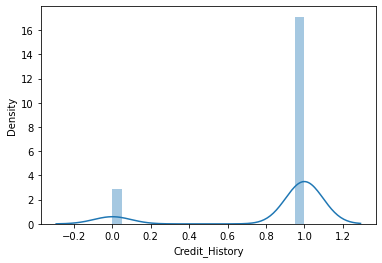

In [87]:
for i in df_num:
    plt.figure()
    sns.distplot(df[i], bins = 20)

### Observations:- 

- Applicant income as per density are lies moreover in the approx range of 0 to 20000 and show right skew distribution.


- Co Applicant income as per density are lies moreover in the approx range of 0 to 10000 and show right skew distribution.


- LoanAmount are lies in the approx range of 0 to 400 and show right skew distribution.


- Loan_Amount_Term are higher in range of 360 while rest are in lower ranges and show left skew distribution.


### Violin Plot

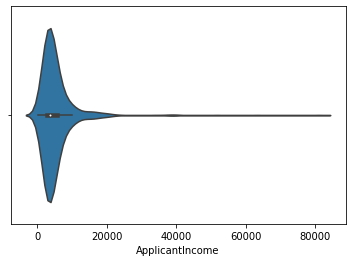

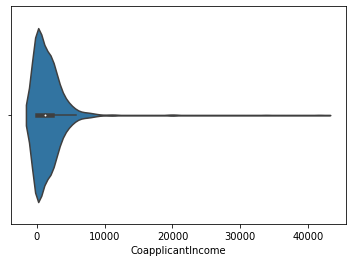

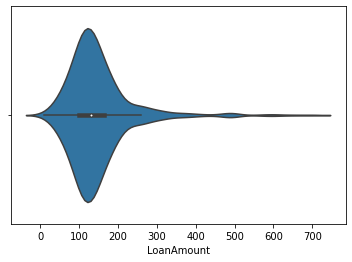

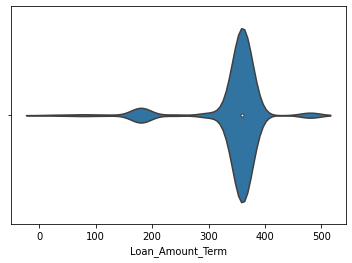

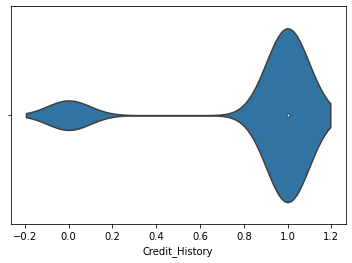

In [88]:
for i in df_num:
    plt.figure()
    sns.violinplot(df[i])

### Observations:- 


- Applicant income as  are lies moreover in the approx range of 0 to 20000.


- Co Applicant income  are lies moreover in the approx range of 0 to 10000.


- LoanAmount are lies in the approx range of 0 to 400.


- Loan_Amount_Term are higher in range of 360 while rest are in lower ranges.


## Checking Outliers

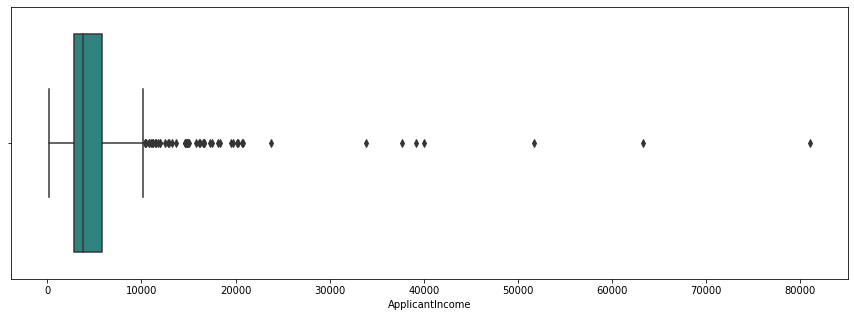

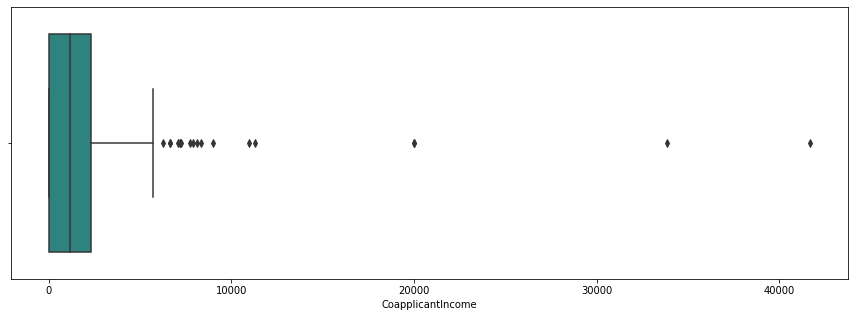

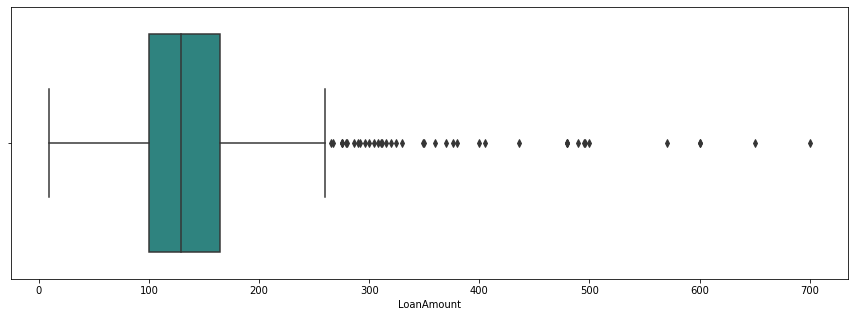

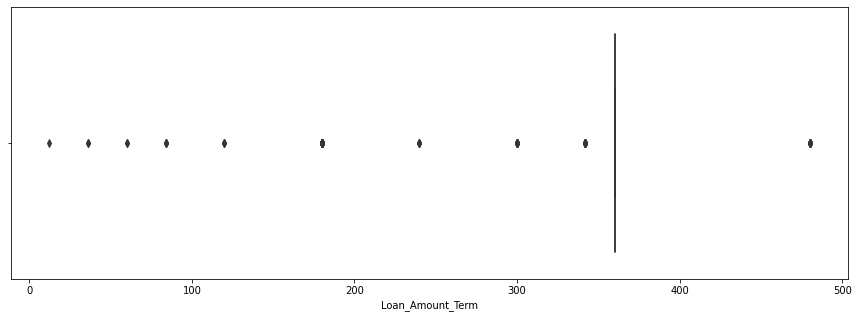

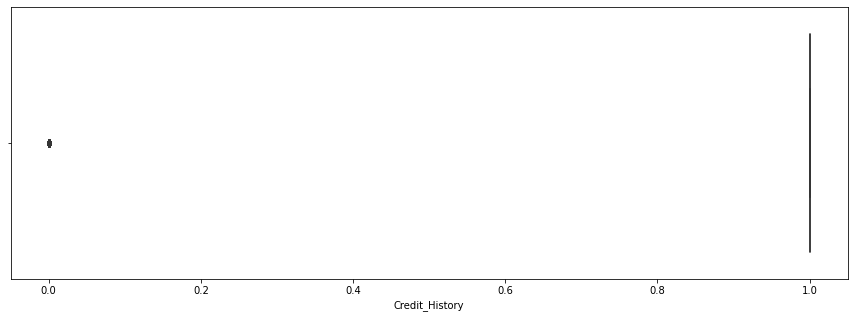

In [89]:
for i in df_num:
    plt.figure(figsize = (15,5))
    sns.boxplot(df[i], orient='v', palette = 'viridis' )

#### Observations: Almost above every column dataset having outliers in the dataset.

## Checking Skewness

In [90]:
# taking numerical column values for skewness checking
num_columns = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"]

In [91]:
df[num_columns].skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
dtype: float64

<Figure size 1080x360 with 0 Axes>

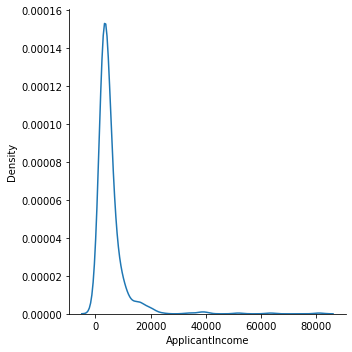

<Figure size 1080x360 with 0 Axes>

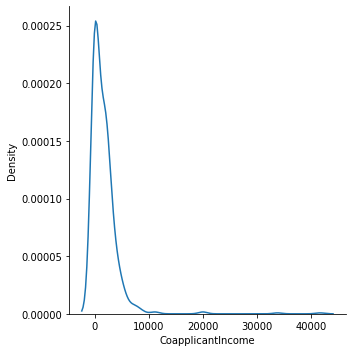

<Figure size 1080x360 with 0 Axes>

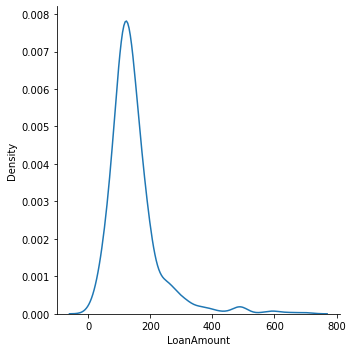

<Figure size 1080x360 with 0 Axes>

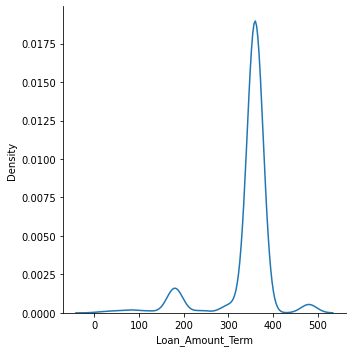

In [94]:
for i in num_columns:
    plt.figure(figsize = (15,5))
    sns.displot(df[i], kind = 'kde', palette = 'viridis' )

### Observations: 
Applicant income, Co applicant income, loan amount shows right skewed dataset but Loan amount terms shows some left skewness towards the dataset.

## Checking overall dataset by Pairplot

<Figure size 1080x1080 with 0 Axes>

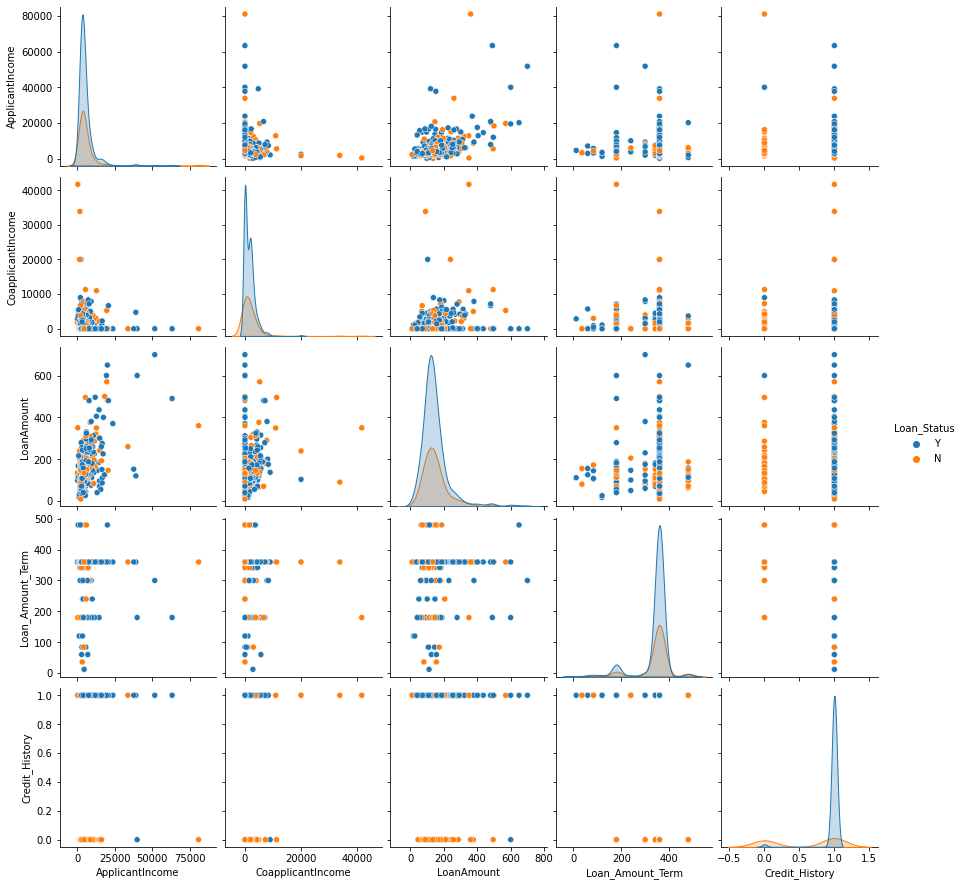

In [95]:
plt.figure(figsize = (15,15))
sns.pairplot(df, hue = "Loan_Status")

Here we match analysis data with a single graph set.

All observations match as per data analysis

## Preprocessing of the dataset

In [95]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.855049
std,6109.041673,2926.248369,84.037468,64.372489,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


<AxesSubplot:>

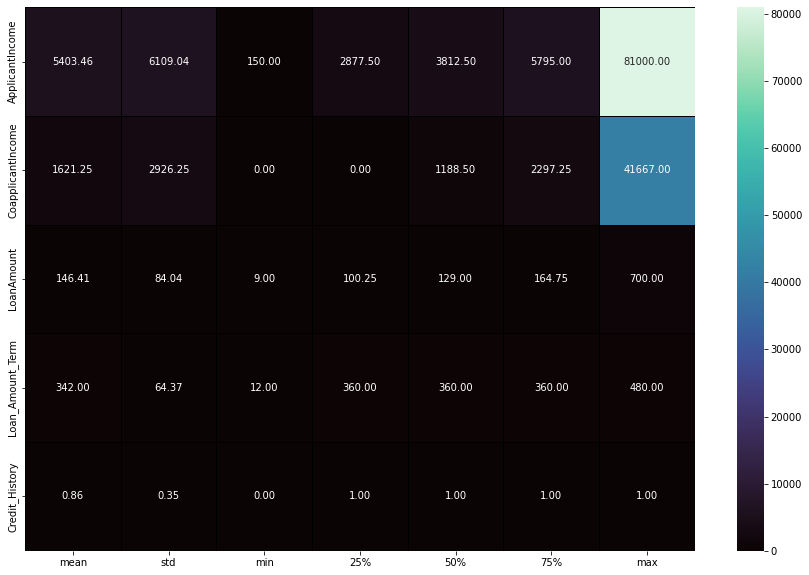

In [96]:
plt.figure(figsize = (15,10))
sns.heatmap(df.describe()[1:].transpose(), annot = True, linecolor='black', linewidths=0.5, fmt = '.2f',cmap = 'mako')

#checking description visually

###     
   - From above information we find that max values of ApplicantIncome, and CoapplicantIncome are much higher than its overall values. Due to these columns of dataset probably having outliers in the dataset.

### Checking Correlation of the dataset

In [97]:
df[num_columns].corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
ApplicantIncome,1.000000,-0.116605,0.565620,-0.045242
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059675
LoanAmount,0.565620,0.187828,1.000000,0.038801
Loan_Amount_Term,-0.045242,-0.059675,0.038801,1.000000


<AxesSubplot:>

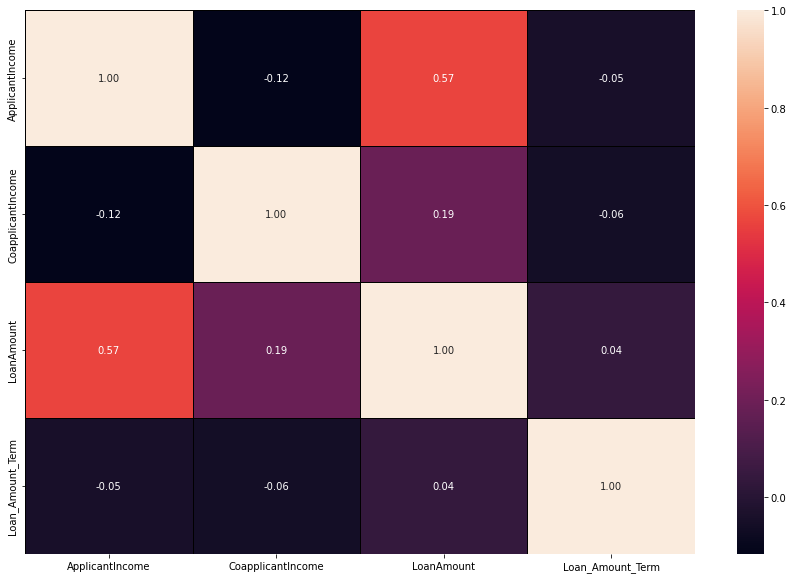

In [98]:
plt.figure(figsize = (15,10))
sns.heatmap(df[num_columns].corr(), annot = True, linecolor = 'black', linewidths = 1, fmt = '.2f', )

#### Observations:-
   - Applicant Income and loan amount are highly correlated with each other.
   - CoApplicant Income and loan amount are also slightly correlated with each other.
   - Only loan amount term positive correlation while others shows negative correlation.

## Checking Positive and Negative Correlation

<AxesSubplot:>

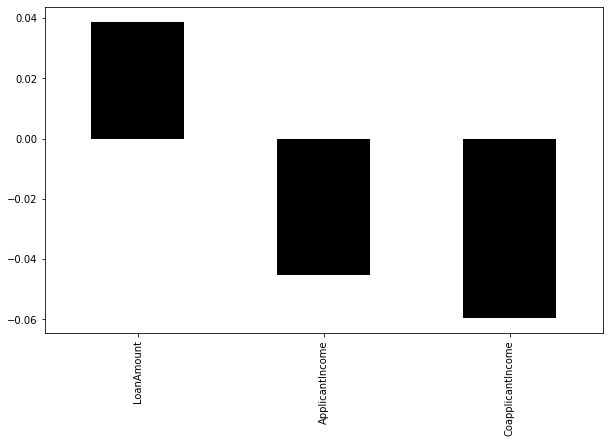

In [99]:
plt.figure(figsize = (10,6))
df[num_columns].corr()["Loan_Amount_Term"].drop("Loan_Amount_Term").sort_values(ascending = False).plot(kind = 'bar', color = 'k')

#### Observations: - ApplicantIncome, CoapplicantIncome shows negative correlation and Loan_Amount_Term shows positive correlation towards the Loan_amount_term.

## Removing Outliers from the Dataset

In [100]:
from scipy.stats import zscore

z = np.abs(zscore(df[num_columns]))

# taking thresold value = 3
#np.where(z>3)

df_new = df[(z<3).all(axis = 1)]

In [101]:
np.where(z>3)  

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
        183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
        432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
        600, 604], dtype=int64),
 array([1, 3, 3, 3, 0, 2, 3, 0, 2, 0, 2, 1, 2, 0, 0, 3, 3, 2, 2, 3, 0, 2,
        2, 1, 0, 1, 2, 0, 2, 3, 3, 2, 2, 2, 3, 2, 3, 1, 3, 1, 2],
       dtype=int64))

In [102]:
print(df_new.shape)
print(df.shape)

(577, 12)
(614, 12)


In [103]:
percentage = round((614-577)/614*100,2)
print(percentage, "Percentage of data loss")  

6.03 Percentage of data loss


## Removing Outliers with Interquartile Method

In [104]:
Q1 = df[df_num].quantile(.25)
Q3 = df[df_num].quantile(.75)
IQR = Q3 - Q1

In [105]:
df_IQR = df[~((df<(Q1 - 1.5*IQR)) | (df>(Q3 + 1.5*IQR))).any(axis = 1)]

In [106]:
print(df_IQR.shape)
print(df.shape)

(388, 12)
(614, 12)


In [107]:
percentage = round((614-388)/614*100,2)
print(percentage, "Percentage of data loss")  

36.81 Percentage of data loss


### From above two methods of removing outliers we find that Zscore give lesser data loss with respect to interquartile method hence we are selecting Zscore method for removing outliers.

## Checking Outliers after removal

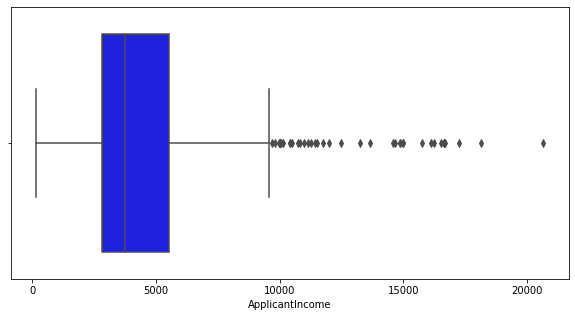

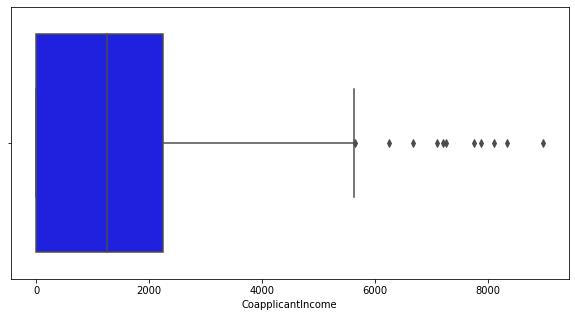

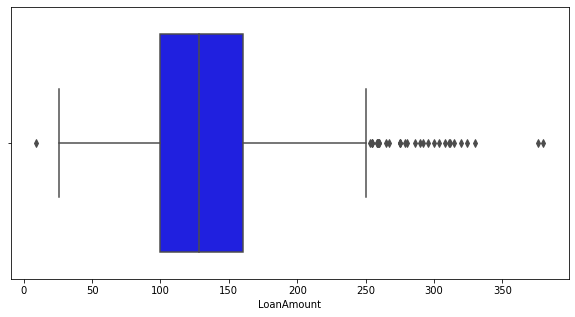

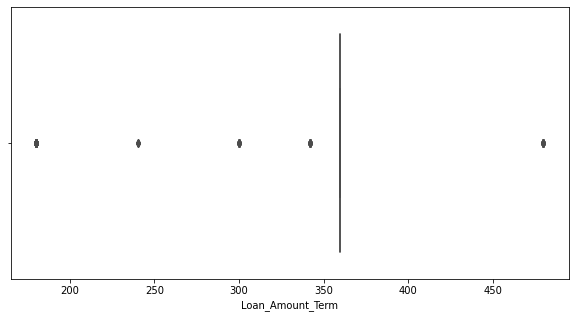

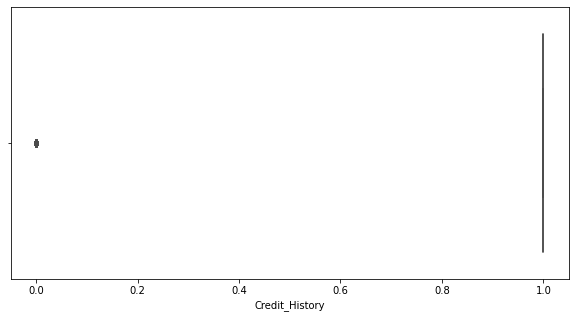

In [108]:
for i in df_num:
    plt.figure(figsize = (10,5))
    sns.boxplot(df_new[i], orient='v', color = 'blue')

### Comparing above dataset and outlier removed dataset we find that some of the outliers has been removed.

## Converting Categorical Dataset to Machine Understandable Form using Label Encoder

In [109]:
objects = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Property_Area', 'Loan_Status','Credit_History']

In [110]:
from sklearn.preprocessing import LabelEncoder
lec = LabelEncoder()
for i in objects:
        df_new[i] = lec.fit_transform(df_new[i].values.reshape(-1,1))

In [111]:
df_new.head(10)  #Checking result of label encoder

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849.0,0.0,146.412162,360.0,1,2,1
1,1,1,1,0,0,4583.0,1508.0,128.000000,360.0,1,0,0
2,1,1,0,0,1,3000.0,0.0,66.000000,360.0,1,2,1
3,1,1,0,1,0,2583.0,2358.0,120.000000,360.0,1,2,1
4,1,0,0,0,0,6000.0,0.0,141.000000,360.0,1,2,1
5,1,1,2,0,1,5417.0,4196.0,267.000000,360.0,1,2,1
6,1,1,0,1,0,2333.0,1516.0,95.000000,360.0,1,2,1
7,1,1,3,0,0,3036.0,2504.0,158.000000,360.0,0,1,0
8,1,1,2,0,0,4006.0,1526.0,168.000000,360.0,1,2,1
10,1,1,2,0,0,3200.0,700.0,70.000000,360.0,1,2,1


### Using Get Dummies Method to prevent overfitting of Model as Model having so many columns with Multiple Unique Values

In [112]:
df_new = pd.get_dummies(data = df_new, columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area'])

In [170]:
df_new.dtypes

ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Loan_Status            int32
Gender_0               uint8
Gender_1               uint8
Married_0              uint8
Married_1              uint8
Dependents_0           uint8
Dependents_1           uint8
Dependents_2           uint8
Dependents_3           uint8
Education_0            uint8
Education_1            uint8
Self_Employed_0        uint8
Self_Employed_1        uint8
Credit_History_0       uint8
Credit_History_1       uint8
Property_Area_0        uint8
Property_Area_1        uint8
Property_Area_2        uint8
dtype: object

#### 

## Dividing data for feature selection

In [171]:
x = df_new.drop('Loan_Status', axis = 1)
y = df_new['Loan_Status']

In [172]:
print('shape of x', x.shape)
print('Shape of y', y.shape)

shape of x (577, 21)
Shape of y (577,)


### Checking multicolinearity of the dataset

In [173]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [174]:
def calc_vif(x):
    
    vif = pd.DataFrame()
    vif['Variance'] = x.columns
    vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return vif


In [175]:
calc_vif(x)  # checking VIF of numerical columns

,Variance,VIF Factor
0,ApplicantIncome,1.634704
1,CoapplicantIncome,1.455747
2,LoanAmount,1.666452
3,Loan_Amount_Term,1.076504
4,Gender_0,inf
5,Gender_1,inf
6,Married_0,inf
7,Married_1,inf
8,Dependents_0,inf
9,Dependents_1,inf


### From above code we find that VIF factor are under the acceptable zone.

## Sythetic Minority Oversampling Technique

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

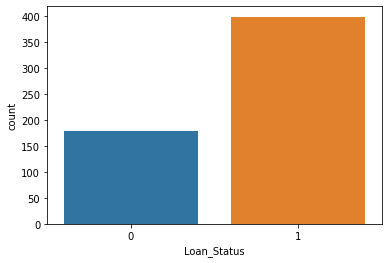

In [176]:
sns.countplot(y)

### We find that Loan_Status values are not balanced and training these dataset for machine learning show biased prediction hence we need to fix it.

In [177]:
from imblearn.over_sampling import SMOTE

In [178]:
sm = SMOTE()
x, y = sm.fit_resample(x, y)

In [179]:
print(x.shape)
print(y.shape)

(796, 21)
(796,)


1    398
0    398
Name: Loan_Status, dtype: int64


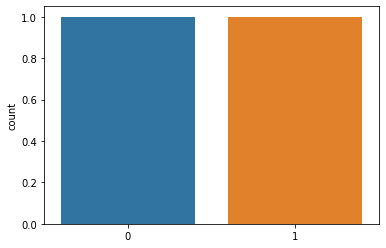

In [180]:
sns.countplot(y.unique())
print(y.value_counts())

## Removing Skewness¶

In [181]:
from sklearn.preprocessing import PowerTransformer
pw = PowerTransformer()

In [182]:
skew_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']

In [183]:
x[skew_columns].skew()  # checking skewness

ApplicantIncome      2.254368
CoapplicantIncome    1.257034
LoanAmount           1.080118
Loan_Amount_Term    -1.856316
dtype: float64

In [184]:
df_skew = x[skew_columns].copy()  # making a new variable so that main dataframe not disturbed

In [185]:
df_skew.skew()

ApplicantIncome      2.254368
CoapplicantIncome    1.257034
LoanAmount           1.080118
Loan_Amount_Term    -1.856316
dtype: float64

### Using Power Transformer Method

In [186]:
skew_x = pw.fit_transform(df_skew)

In [187]:
skew_x = pd.DataFrame(data = skew_x, columns = skew_columns)

In [188]:
skew_x.skew()

ApplicantIncome      0.020432
CoapplicantIncome   -0.157497
LoanAmount           0.050378
Loan_Amount_Term     0.570361
dtype: float64

#### Observations: All are under thresold value but slightly Loan_amount_term shows little bit more then thresold value hence we trying to checking some other methods for better model performance

### Using Square root method 

In [189]:
df_skew = x[skew_columns].copy()  # making a new variable so that main dataframe not disturbed
df_skew = np.sqrt(df_skew)

In [190]:
df_skew.skew()

ApplicantIncome      1.262175
CoapplicantIncome    0.213269
LoanAmount           0.310013
Loan_Amount_Term    -2.295006
dtype: float64

#### Observations: By the use of square root method we find that there are 3 columns of dataset are above from skewness thresold values.

### Using Reciprocal method

In [191]:
df_skew = x[skew_columns].copy()  # making a new variable so that main dataframe not disturbed
df_skew = 1/(df_skew)

In [192]:
df_skew.skew()

ApplicantIncome      12.901997
CoapplicantIncome          NaN
LoanAmount            9.091855
Loan_Amount_Term      3.100761
dtype: float64

#### Observations: Due to use of reciprocal method some of the dataset become nullify hence we can't consider it.

### Using Log method

In [193]:
df_skew = x[skew_columns].copy()  # making a new variable so that main dataframe not disturbed
df_skew = np.log(df_skew)

In [194]:
df_skew.skew()

ApplicantIncome     -0.150256
CoapplicantIncome         NaN
LoanAmount          -0.748134
Loan_Amount_Term    -2.637771
dtype: float64

#### Observations: Due to use of log method some of the dataset become nullify hence we can't consider it.

### We are selecting Power transformer method for skewness removal as it gives good result than above method.  Also we can remove skewness by taking individually columns of dataset but due to short dataset it disturb main dataset for modeling hence we are not considering it.

In [195]:
x[skew_columns] = pw.fit_transform(x[skew_columns])

In [196]:
x[skew_columns].skew()

ApplicantIncome      0.020432
CoapplicantIncome   -0.157497
LoanAmount           0.050378
Loan_Amount_Term     0.570361
dtype: float64

## Scaling Dataset

In [197]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [198]:
x[skew_columns] = sc.fit_transform(x[skew_columns])

In [199]:
x.head(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_0,Gender_1,Married_0,Married_1,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Education_0,Education_1,Self_Employed_0,Self_Employed_1,Credit_History_0,Credit_History_1,Property_Area_0,Property_Area_1,Property_Area_2
0,0.711133,-1.101768,0.296107,0.136225,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1
1,0.264707,0.763579,-0.045963,0.136225,0,1,0,1,0,1,0,0,1,0,1,0,0,1,1,0,0
2,-0.499981,-1.101768,-1.513834,0.136225,0,1,0,1,1,0,0,0,1,0,0,1,0,1,0,0,1
3,-0.766799,0.907670,-0.204567,0.136225,0,1,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1
4,0.758049,-1.101768,0.198602,0.136225,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1


## Feature Selection

### Since output variables having boolean variables hence we use classification model

In [200]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [201]:
class best_model:
    def best_fit(x, y, model):  # finding best fit random state
        random_state_values = []
        for i in range(0,200):
            x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = i, test_size = 0.20)
            model.fit(x_train, y_train)
            pred_train = model.predict(x_train)
            pred_test = model.predict(x_test)

            if round(accuracy_score(y_train, pred_train)*100,1) == round(accuracy_score(y_test, pred_test)*100,1):
                print("At random_state:-", i)
                print("Training accuracy_score is:-", accuracy_score(pred_train, y_train)*100)
                print("Testing accuracy_score is:-", accuracy_score(pred_test, y_test)*100)
                print("\n")
                random_state_values.append(i)
        print("Best fit random_state_values", random_state_values)
    
    
    def final_model(x, y, model, i):  # using random state
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = i)
        model.fit(x_train, y_train)
        pred_train = model.predict(x_train)
        pred_test = model.predict(x_test)
        print("At random state", i , "model giving best accuracy score","\n")
        Train_accuracy = accuracy_score(pred_train, y_train)
        Test_accuracy = accuracy_score(pred_test, y_test)
        print('Training accuracy:- ', Train_accuracy*100)
        print('Testing accuracy:- ', Test_accuracy*100)
        print("\n")
        print('--------------------------------------')
        print('Confusion Matrix')
        print(confusion_matrix(pred_test, y_test) )
        print("\n")
        print('Classification Report')
        print(classification_report(pred_test, y_test) )
        

    def cross_val_score(model, x, y):
        for value in range(2,8):
            cv = cross_val_score(model, x, y, cv = value).mean()
            print('cross_val_score', cv*100,'at cv =', value,"\n")


## Model 1 Logisitc Regression

In [208]:
model = LogisticRegression()

In [209]:
best_model.best_fit(x, y, model)   #finding best random state

At random_state:- 22
Training accuracy_score is:- 86.16352201257862
Testing accuracy_score is:- 86.25


At random_state:- 41
Training accuracy_score is:- 86.16352201257862
Testing accuracy_score is:- 86.25


At random_state:- 61
Training accuracy_score is:- 86.16352201257862
Testing accuracy_score is:- 86.25


At random_state:- 126
Training accuracy_score is:- 86.16352201257862
Testing accuracy_score is:- 86.25


At random_state:- 170
Training accuracy_score is:- 86.16352201257862
Testing accuracy_score is:- 86.25


At random_state:- 199
Training accuracy_score is:- 86.16352201257862
Testing accuracy_score is:- 86.25


Best fit random_state_values [22, 41, 61, 126, 170, 199]


#### Model giving best accuracy score at random state value 22

In [210]:
best_model.final_model(x, y, model, 22)

At random state 22 model giving best accuracy score 

Training accuracy:-  86.16352201257862
Testing accuracy:-  86.25


--------------------------------------
Confusion Matrix
[[54  3]
 [19 84]]


Classification Report
              precision    recall  f1-score   support

           0       0.74      0.95      0.83        57
           1       0.97      0.82      0.88       103

    accuracy                           0.86       160
   macro avg       0.85      0.88      0.86       160
weighted avg       0.89      0.86      0.87       160



In [211]:
best_model.cross_val_score(model, x, y)

cross_val_score 80.65326633165829 at cv = 2 

cross_val_score 83.05527970870573 at cv = 3 

cross_val_score 84.67336683417086 at cv = 4 

cross_val_score 84.9441823899371 at cv = 5 

cross_val_score 84.8257006151743 at cv = 6 

cross_val_score 85.32725619358129 at cv = 7 



## Model 2 GaussianNB

In [212]:
model = GaussianNB()

In [213]:
best_model.best_fit(x, y, model)  #finding best random state

At random_state:- 70
Training accuracy_score is:- 81.91823899371069
Testing accuracy_score is:- 81.875


Best fit random_state_values [70]


#### Model giving best accuracy score at random state value 70

In [215]:
best_model.final_model(x, y, model, 70)

At random state 70 model giving best accuracy score 

Training accuracy:-  81.91823899371069
Testing accuracy:-  81.875


--------------------------------------
Confusion Matrix
[[47  0]
 [29 84]]


Classification Report
              precision    recall  f1-score   support

           0       0.62      1.00      0.76        47
           1       1.00      0.74      0.85       113

    accuracy                           0.82       160
   macro avg       0.81      0.87      0.81       160
weighted avg       0.89      0.82      0.83       160



In [216]:
best_model.cross_val_score(model, x, y)

cross_val_score 77.63819095477386 at cv = 2 

cross_val_score 79.28074904241737 at cv = 3 

cross_val_score 79.77386934673366 at cv = 4 

cross_val_score 80.16430817610063 at cv = 5 

cross_val_score 80.03721424774056 at cv = 6 

cross_val_score 80.41564087209174 at cv = 7 



## Model 3 SGDClassifier

In [219]:
model = SGDClassifier()

In [220]:
best_model.best_fit(x, y, model)  #finding best random state

At random_state:- 51
Training accuracy_score is:- 83.80503144654088
Testing accuracy_score is:- 83.75


At random_state:- 66
Training accuracy_score is:- 86.16352201257862
Testing accuracy_score is:- 86.25


At random_state:- 82
Training accuracy_score is:- 82.54716981132076
Testing accuracy_score is:- 82.5


At random_state:- 137
Training accuracy_score is:- 81.91823899371069
Testing accuracy_score is:- 81.875


At random_state:- 190
Training accuracy_score is:- 86.16352201257862
Testing accuracy_score is:- 86.25


Best fit random_state_values [51, 66, 82, 137, 190]


#### Model giving best accuracy score at random state value 66

In [221]:
best_model.final_model(x, y, model, 66)

At random state 66 model giving best accuracy score 

Training accuracy:-  85.37735849056604
Testing accuracy:-  82.5


--------------------------------------
Confusion Matrix
[[62  7]
 [21 70]]


Classification Report
              precision    recall  f1-score   support

           0       0.75      0.90      0.82        69
           1       0.91      0.77      0.83        91

    accuracy                           0.82       160
   macro avg       0.83      0.83      0.82       160
weighted avg       0.84      0.82      0.83       160



In [222]:
best_model.cross_val_score(model, x, y)

cross_val_score 80.77889447236181 at cv = 2 

cross_val_score 77.77557100297915 at cv = 3 

cross_val_score 82.03517587939699 at cv = 4 

cross_val_score 83.93789308176102 at cv = 5 

cross_val_score 84.44121667805878 at cv = 6 

cross_val_score 78.7688247166589 at cv = 7 



### Above SGD classifier shows different different testing and training accuracy when we trying to find best random state hence this model shows overfitting hence we cannot consider it for machine learning.

#### 

## Model 4 Random Forest Classifier

In [223]:
model = RandomForestClassifier()

In [224]:
for i in range(80,92):
        x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = i, test_size = 0.20)
        model.fit(x_train, y_train)
        pred_train = model.predict(x_train)
        pred_test = model.predict(x_test)
        print("At random_state:-", i)
        print("Training accuracy_score is:-", accuracy_score(pred_train, y_train)*100)
        print("Testing accuracy_score is:-", accuracy_score(pred_test, y_test)*100)
        
        print("\n")
        

At random_state:- 80
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 82.5


At random_state:- 81
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 79.375


At random_state:- 82
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 90.0


At random_state:- 83
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 87.5


At random_state:- 84
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 78.75


At random_state:- 85
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 85.625


At random_state:- 86
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 89.375


At random_state:- 87
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 83.125


At random_state:- 88
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 90.625


At random_state:- 89
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 80.625


At random_state:- 90
Training accuracy_score is:- 100.0
Testing accuracy_scor

#### Model giving best accuracy score at random state value 82

In [225]:
best_model.final_model(x, y, model, 82)

At random state 82 model giving best accuracy score 

Training accuracy:-  100.0
Testing accuracy:-  85.625


--------------------------------------
Confusion Matrix
[[63 13]
 [10 74]]


Classification Report
              precision    recall  f1-score   support

           0       0.86      0.83      0.85        76
           1       0.85      0.88      0.87        84

    accuracy                           0.86       160
   macro avg       0.86      0.85      0.86       160
weighted avg       0.86      0.86      0.86       160



In [226]:
best_model.cross_val_score(model, x, y)

cross_val_score 80.90452261306534 at cv = 2 

cross_val_score 82.4244573698397 at cv = 3 

cross_val_score 83.91959798994975 at cv = 4 

cross_val_score 83.5573899371069 at cv = 5 

cross_val_score 83.9428115743905 at cv = 6 

cross_val_score 84.82045822520904 at cv = 7 



### Above RandomForest classifier shows different different testing and training accuracy when we trying to find best random state hence this model shows overfitting hence we cannot consider it for machine learning.

### 

## Model 5 AdaBoostClassifier

In [227]:
model = AdaBoostClassifier()

In [228]:
best_model.best_fit(x, y, model)   #finding best random state

At random_state:- 149
Training accuracy_score is:- 86.9496855345912
Testing accuracy_score is:- 86.875


Best fit random_state_values [149]


#### Model giving best accuracy score at random state value 149

In [229]:
best_model.final_model(x, y, model, 149)

At random state 149 model giving best accuracy score 

Training accuracy:-  86.9496855345912
Testing accuracy:-  86.875


--------------------------------------
Confusion Matrix
[[64  8]
 [13 75]]


Classification Report
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        72
           1       0.90      0.85      0.88        88

    accuracy                           0.87       160
   macro avg       0.87      0.87      0.87       160
weighted avg       0.87      0.87      0.87       160



In [231]:
for value in range(2,15):
    cv = cross_val_score(model, x, y, cv = value).mean()
    print('cross_val_score', cv*100,'at cv =', value,"\n")

cross_val_score 76.75879396984925 at cv = 2 

cross_val_score 79.53374001040338 at cv = 3 

cross_val_score 79.89949748743719 at cv = 4 

cross_val_score 82.1816037735849 at cv = 5 

cross_val_score 82.18747626642363 at cv = 6 

cross_val_score 83.31558985960477 at cv = 7 

cross_val_score 83.2159090909091 at cv = 8 

cross_val_score 82.73039382589944 at cv = 9 

cross_val_score 83.21677215189872 at cv = 10 

cross_val_score 83.23474470734745 at cv = 11 

cross_val_score 82.98469772350371 at cv = 12 

cross_val_score 83.22621323678968 at cv = 13 

cross_val_score 83.82339778016471 at cv = 14 



### Finalizing Best Models

#### From above 5 model we find 3 shows good results.

In [256]:
# models                 accuracy_score_training  accuracy_score_training  CV score        CV state    Differences in accuracy

# LogisticRegression     86.16352201257862         86.25                 85.32725619358129      7      0.08647798742137525
# GaussianNB             81.91823899371069         81.875                80.41564087209174      7      0.04323899371068762
# AdaBoostClassifier     86.9496855345912          86.875                83.31558985960477      7      0.07468553459119676

### From above Machine Learning Models we find that Logistics Regression show good accuracy with Neglible error with lower differences in accuracy score.
Hence we are selecting it for model learning.

### Emsemble Technique

## Hyper Parameter Tuning

In [236]:
# using hyper parameter tuning for AdaBoost Classifier to find out best criterion

model = LogisticRegression()

#Default params
# LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, 
#                    class_weight=None, random_state=None, 
#                    solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

param = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'], 
             'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
             'max_iter' : [100, 150, 200], 
            'multi_class' : ['auto', 'ovr', 'multinomial']}

gd = GridSearchCV(model, param_grid=param, cv = 7)
gd.fit(x, y)
gd.best_params_

# {'max_iter': 100,
#  'multi_class': 'auto',
#  'penalty': 'none',
#  'solver': 'newton-cg'}

{'max_iter': 100,
 'multi_class': 'auto',
 'penalty': 'none',
 'solver': 'newton-cg'}

# Final Model Logistics Regression

In [241]:
model = LogisticRegression(max_iter = 100, multi_class = 'auto', penalty = 'none', solver = 'newton-cg' )

In [242]:
best_model.best_fit(x, y, model)  #finding best random state

At random_state:- 51
Training accuracy_score is:- 86.16352201257862
Testing accuracy_score is:- 86.25


At random_state:- 70
Training accuracy_score is:- 86.16352201257862
Testing accuracy_score is:- 86.25


At random_state:- 170
Training accuracy_score is:- 86.16352201257862
Testing accuracy_score is:- 86.25


At random_state:- 190
Training accuracy_score is:- 86.16352201257862
Testing accuracy_score is:- 86.25


Best fit random_state_values [51, 70, 170, 190]


### At Random State 51 model gives best accuracy score

In [243]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 51)
model.fit(x_train, y_train)
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)
print("At random state", 51 , "model giving best accuracy score","\n")
Train_accuracy = accuracy_score(pred_train, y_train)
Test_accuracy = accuracy_score(pred_test, y_test)
print('Training accuracy:- ', Train_accuracy*100)
print('Testing accuracy:- ', Test_accuracy*100)
print("\n")
print('--------------------------------------')
print('Confusion Matrix')
print(confusion_matrix(pred_test, y_test) )
print("\n")
print('Classification Report')
print(classification_report(pred_test, y_test) )   # at random state 60 model shows best accuracy

At random state 51 model giving best accuracy score 

Training accuracy:-  86.16352201257862
Testing accuracy:-  86.25


--------------------------------------
Confusion Matrix
[[62  2]
 [20 76]]


Classification Report
              precision    recall  f1-score   support

           0       0.76      0.97      0.85        64
           1       0.97      0.79      0.87        96

    accuracy                           0.86       160
   macro avg       0.87      0.88      0.86       160
weighted avg       0.89      0.86      0.86       160



In [244]:
cv = cross_val_score(model, x, y, cv = 7).mean()
print('cross_val_score', cv*100,'at cv =', 7  )

cross_val_score 85.57899172710536 at cv = 7


## Using Predict Proba function for finding accuracy (i.e Getting approved loan)

In [245]:
final_pred_prob = model.predict_proba(x_test)[:, 1]

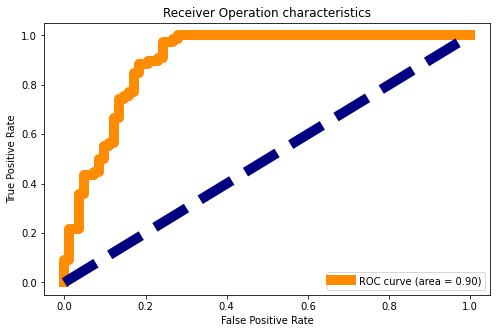

In [246]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresolds = roc_curve(y_test, final_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (8,5))
plt.plot(fpr, tpr, color = 'darkorange', lw = 10, label = "ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0,1],[0,1], color = 'navy', lw = 10, linestyle = '--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operation characteristics")
plt.legend(loc = "lower right")
plt.show()

### Deploy Model

In [247]:
import pickle

filename = "Loan_prediction.pkl"
pickle.dump(model, open(filename, 'wb'))

### Loading Model

In [248]:
load = pickle.load(open('Loan_prediction.pkl', 'rb'))
result = load.score(x_test, y_test)
print(result)

0.8625


### Conclusion

In [249]:
conclusion = pd.DataFrame()
conclusion['Predicted Loan Status'] = np.array(model.predict(x_test))
conclusion['Actual Loan Status'] = np.array(y_test)

In [257]:
conclusion.sample(25)

,Predicted Loan Status,Actual Loan Status
112,0,0
19,0,0
145,1,1
105,0,0
51,0,0
158,0,0
15,1,1
123,1,1
159,0,0
71,1,0


#### 

## Using Predict Proba function for finding accuracy (i.e Getting rejected loan)

In [254]:
final_pred_prob = model.predict_proba(x_test)[:, 0]

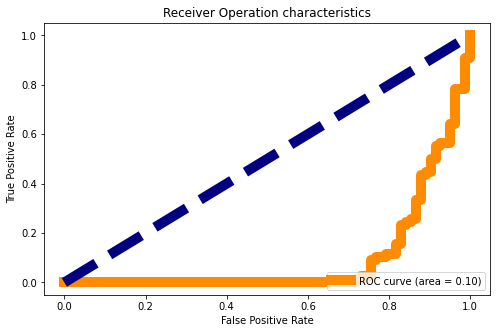

In [255]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresolds = roc_curve(y_test, final_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (8,5))
plt.plot(fpr, tpr, color = 'darkorange', lw = 10, label = "ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0,1],[0,1], color = 'navy', lw = 10, linestyle = '--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operation characteristics")
plt.legend(loc = "lower right")
plt.show()

In [4]:
89.03420523138833-89.10127431254192 


-0.06706908115359056